_Тестовое задание на ваканcию 'Junior Data Scientist'_  
Исполнитель: **Анастасия Алимова**  

### Задача:  
- Используя информацию из предоставленного датасета, разработать алгоритм определения зависимости спроса от погоды (температуры воздуха)

- Результатом должен быть коэффициент, который будет показывать как сильно реагирует каждая из групп спроса на изменение температуры в разрезе распределительных центров  

- Также необходиом добавить: описание используемой модели, анализа качества и визуализацию результата (желательно в формате презентации)

Импортируем необходимые библиотеки

In [1]:
import numpy as np 
import pandas as pd 
# import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data

На первом этапе посмотрим на содержание датасета: информацию, которую он содержит, на количество пропусков и т.д.

In [2]:
df = pd.read_excel('datasets\df_magnit.xlsx')
df

,Дата,Распределительный центр,Товарная группа,"Продажи, шт","Наполненность, %","Цена фактическая,руб",Кол-во ТТ с прод/ост,"Доля Промо,%"
0,2019-07-03,РЦ_24377,1971_Квас,5139.166667,93.632097,59.2,1822.0,29.7
1,2019-07-03,РЦ_27089,1945_Негазирова,19474.591750,98.447730,28.4,11372.0,39.0
2,2019-07-03,РЦ_27089,1962_Газированн,18357.500000,99.417829,54.9,26471.0,89.9
3,2019-07-03,РЦ_28508,16854_Вкусовые п,174.166667,98.771609,41.0,113.0,86.6
4,2019-07-03,РЦ_31927,1984_Холодные ч,1851.666667,98.066521,48.5,5143.0,59.2
...,...,...,...,...,...,...,...,...
57461,2019-07-16,РЦ_31079,1929_Газированн,3179.166667,99.805855,24.1,2622.0,22.0
57462,2019-07-16,РЦ_31079,16854_Вкусовые п,570.000000,100.000000,44.2,860.0,37.3
57463,2019-07-16,РЦ_31927,1929_Газированн,3178.333333,85.710144,27.8,4614.0,25.9
57464,2019-07-16,РЦ_34071,1962_Газированн,15250.000000,99.881974,65.2,28061.0,62.2


Для удобства работы с колонками переименуем их

In [3]:
df.columns = ['date', 'dist_cent', 'group', 'sold_amount', 'fullness', 'price', 'left', 'promo_amount']

Описание датасета

In [4]:
# посмтрим, на информацию о данных
print(f'Количество строк: {len(df)}')
print(df.info())

Количество строк: 57466
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57466 entries, 0 to 57465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          57466 non-null  datetime64[ns]
 1   dist_cent     57466 non-null  object        
 2   group         57466 non-null  object        
 3   sold_amount   57466 non-null  float64       
 4   fullness      57466 non-null  float64       
 5   price         57434 non-null  float64       
 6   left          57434 non-null  float64       
 7   promo_amount  57434 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.5+ MB
None


Итак, в нескольних колонках имеются пропуски:
- price (цена фактическая)   
- left (остаткок) 
- promo_amount

In [5]:
print(f'Количество пропусков в колонке "price": {len(df) - df.price.count()}')
print(f'Количество пропусков в колонке "left": {len(df) - df.left.count()}')
print(f'Количество пропусков в колонке "promo_amount": {len(df) - df.promo_amount.count()}')

Количество пропусков в колонке "price": 32
Количество пропусков в колонке "left": 32
Количество пропусков в колонке "promo_amount": 32


Поскольку необходимо опеределить коэффицент зависимости спроса от погоды каждой из групп товаров, следует посмотреть, какие группы представленны в датасете

1945_Негазирова     6736
1971_Квас           6614
1962_Газированн     6553
1929_Газированн     6550
16857_Воды минер    6550
1984_Холодные ч     6549
1992_Энергетиче     6547
16854_Вкусовые п    6538
16853_Газированн    4829
Name: group, dtype: int64


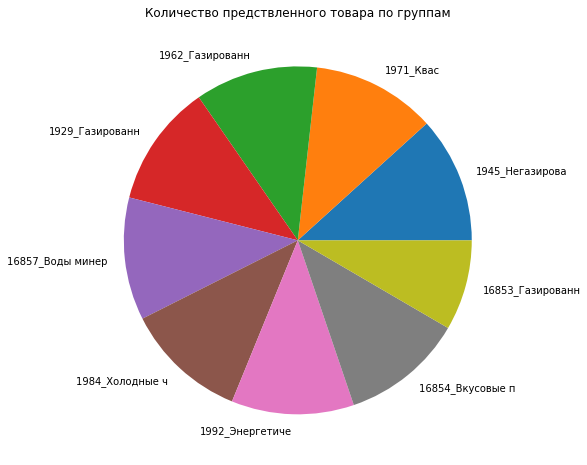

In [6]:
print(df.group.value_counts())

# визуализируем в виде круговой диаграммы
df.group.value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Количество предствленного товара по группам")
plt.ylabel("")
plt.show()

А также определим, сколько распределетильных центр представленно в датасете

In [7]:
print(f'Кол-во уникальных распределительных центов: {df.dist_cent.nunique()}')

dist_centers = df.dist_cent.unique()
print(dist_centers)

Кол-во уникальных распределительных центов: 38
['РЦ_24377' 'РЦ_27089' 'РЦ_28508' 'РЦ_31927' 'РЦ_33094' 'РЦ_34071'
 'РЦ_52404' 'РЦ_53102' 'РЦ_56831' 'РЦ_93621' 'РЦ_106438' 'РЦ_24372'
 'РЦ_37137' 'РЦ_53351' 'РЦ_61641' 'РЦ_81062' 'РЦ_94060' 'РЦ_30618'
 'РЦ_56832' 'РЦ_90361' 'РЦ_85167' 'РЦ_25637' 'РЦ_31079' 'РЦ_55312'
 'РЦ_61224' 'РЦ_35976' 'РЦ_53222' 'РЦ_85262' 'РЦ_109873' 'РЦ_52401'
 'РЦ_80285' 'РЦ_23245' 'РЦ_34946' 'РЦ_80256' 'РЦ_55722' 'РЦ_57577'
 'РЦ_85060' 'РЦ_182572']


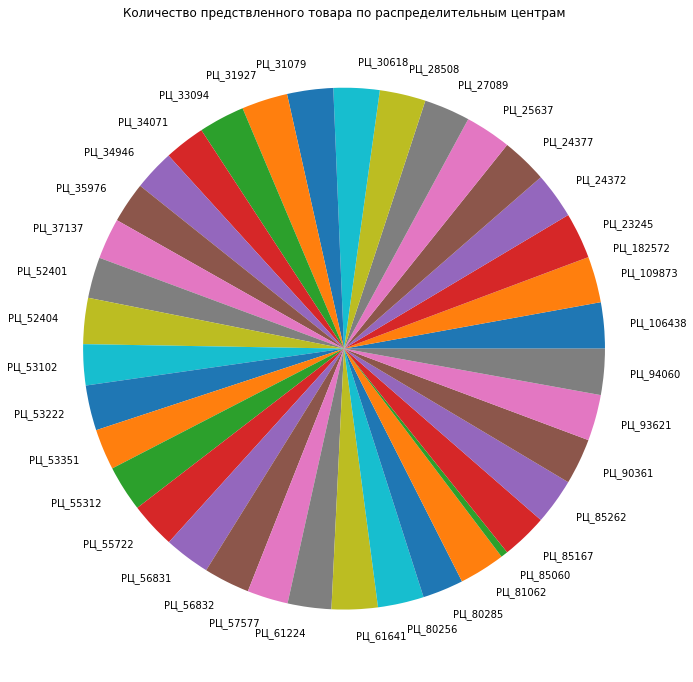

In [8]:
df.groupby('dist_cent').size().plot(kind='pie', subplots=True, figsize=(12, 12))

plt.title("Количество предствленного товара по распределительным центрам")
plt.ylabel("")
plt.show()

Во всех распределительных центрах примерно равное кол-во товаров. Существенно отличается, пожалуй, только РЦ-85060

По заданию кол-во необходимо делать выводы в разрезе распределительных центов.  
Для объединения можно использовать метод groupby  

Text(0, 0.5, 'Продано (* 10^7)')

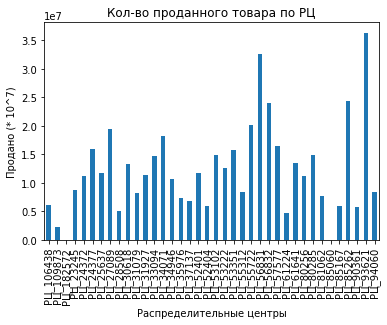

In [11]:
# с помощью метода groupby можно посмотреть, например, в каком РЦ было продано больше всего товара
df.groupby('dist_cent').sum().sold_amount.plot.bar()
plt.title('Кол-во проданного товара по РЦ')
plt.xlabel('Распределительные центры')
plt.ylabel('Продано (* 10^7)')

Text(0.5, 1.0, 'Кол-во проданных товаров в РЦ-24377')

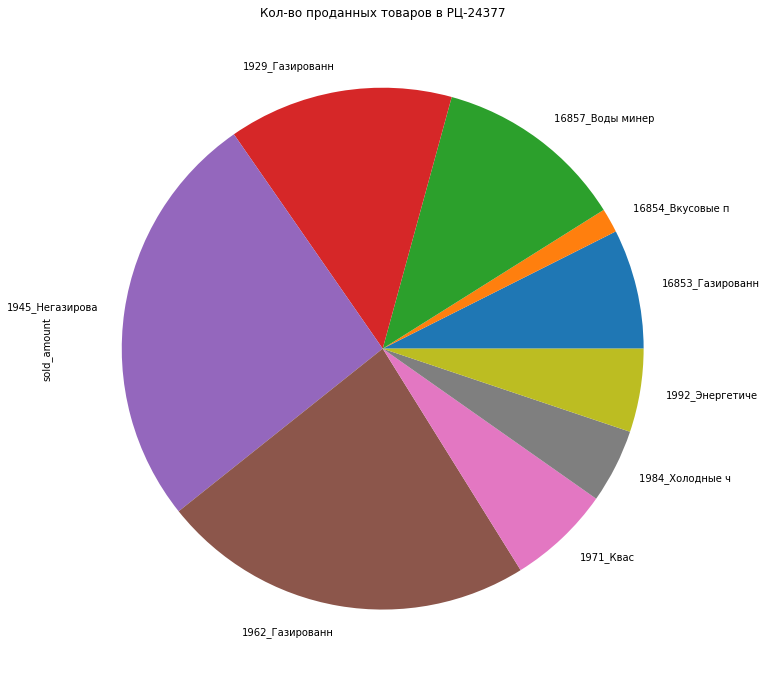

In [12]:
# for i in df.dist_cent:
#     df[df.dist_cent == i].groupby('group').sold_amount.mean().plot(kind='pie', subplots=True, figsize=(12, 12))

# с помощью этого же метода можно посмотреть кол-во проданных товаров по группам (для примера возмем любой РЦ)
df[df.dist_cent == 'РЦ_24377'].groupby('group').sold_amount.mean().plot(kind='pie', subplots=True, figsize=(12, 12))
plt.title('Кол-во проданных товаров в РЦ-24377')

### Основная часть

По заданию необходимо определить зависимость спроса от погоды (температуры воздуха), найдя коэффициент, который будет показывать как сильно реагирует каждая из групп спроса на изменение температуры в разрезе распределительных центров.  

Для того, чтобы решить задачу нужно определиться с тем, 1) что формирует спрос, 2) из чего складывается погода.  

По сути, **погода** определяется данными о местоположении, в качестве которого у нас выступает номер распределительного центра, а также датой. Это как раз известные нам данные.  

**Спрос** - это зависимость между ценой и количеством товара, который покупатели могут и желают купить по строго определённой цене (в определённый промежуток времени)

#### Коэффициент корреляции

Для того, чтобы оперделить, как влияет дата (от которой зависит температура воздуха) на каждый признак, например, на кол-во покупок (одна из формирующих спроса), создадим таблицу корреляций в разрезе **каждого** распределительного центра для **каждого** продукта отдельно.

In [13]:
# посмотрим на представленный временной промежуток
min_date = df.date.min().strftime('%d.%m.%Y')
max_date = df.date.max().strftime('%d.%m.%Y')
print(f'В датасете зафиксирована информация о продажах с {min_date} по {max_date}')

# Посмотрим, какие месяцы есть в датасете
print(df.date.apply(lambda x: x.strftime('%m')).value_counts())

В датасете зафиксирована информация о продажах с 01.06.2018 по 30.07.2020
07    29055
06    28411
Name: date, dtype: int64


Похоже, только июнь и июль

In [14]:
# переводим дату в нужный для построения корреляции формат
data = df.copy()
data.date=pd.to_numeric(df.date)

# ввередм признак "процент продаж" на основе отношения проданного товара к общему числу товара
def sale_share(row):
    return row['sold_amount'] / (row['sold_amount'] + row['left'])

data['sold_share'] = df.apply(sale_share, axis=1)

# строим таблицу корреляций в разрезе каждого распределительного центра
for i in data.dist_cent.unique():
    print(i)
    display(data[data.dist_cent == i].groupby('group').corr())

РЦ_24377


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.473512  0.263692  0.834456   
                 sold_amount  -0.473512     1.000000 -0.186516 -0.497824   
                 fullness      0.263692    -0.186516  1.000000  0.414240   
                 price         0.834456    -0.497824  0.414240  1.000000   
                 left          0.030298     0.090076  0.168519 -0.197265   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.068676    -0.068063  1.000000 -0.608741   
                 price         0.014646    -0.012259 -0.608741  1.000000   
                 left          0.952480     0.760151  0.017752  0.006079   
                 promo_amount  0.023770     0.233163  0.558438 -0.660987   
                 sold_share    0.015561     0.593792 -0.170516 -0.028848   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.030298      0.105440   -0.417634  
                 sold_amount   0.090076      0.119046    0.720061  
                 fullness      0.168519     -0.013198   -0.247447  
                 price        -0.197265     -0.257386   -0.261365  
                 left          1.000000      0.242223   -0.610037  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.017752      0.558438   -0.170516  
                 price         0.006079     -0.660987   -0.028848  
                 left          1.000000      0.005582   -0.042873  
                 promo_amount  0.005582      1.000000    0.312663  
                 sold_share   -0.042873      0.312663    1.000000  

[63 rows x 7 columns]

РЦ_27089


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.269282 -0.446434  0.646370   
                 sold_amount  -0.269282     1.000000 -0.185532  0.074883   
                 fullness     -0.446434    -0.185532  1.000000 -0.585608   
                 price         0.646370     0.074883 -0.585608  1.000000   
                 left         -0.512122     0.444047  0.142558 -0.040776   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.447404    -0.558251  1.000000 -0.198444   
                 price         0.238863     0.108833 -0.198444  1.000000   
                 left          0.589510     0.549794  0.018119 -0.083582   
                 promo_amount  0.325519     0.455308 -0.146787 -0.444294   
                 sold_share    0.780345     0.895771 -0.642348  0.172139   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.512122      0.065688    0.122867  
                 sold_amount   0.444047      0.458407    0.690022  
                 fullness      0.142558     -0.168607   -0.312346  
                 price        -0.040776      0.222091    0.122318  
                 left          1.000000      0.379299   -0.322846  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.018119     -0.146787   -0.642348  
                 price        -0.083582     -0.444294    0.172139  
                 left          1.000000      0.427358    0.134839  
                 promo_amount  0.427358      1.000000    0.325783  
                 sold_share    0.134839      0.325783    1.000000  

[63 rows x 7 columns]

РЦ_28508


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.913108 -0.586692  0.196802   
                 sold_amount   0.913108     1.000000 -0.614318  0.019798   
                 fullness     -0.586692    -0.614318  1.000000  0.158640   
                 price         0.196802     0.019798  0.158640  1.000000   
                 left          0.958805     0.937167 -0.574929  0.134267   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.071165    -0.103248  1.000000  0.238357   
                 price        -0.470843    -0.562109  0.238357  1.000000   
                 left          0.872955     0.820585  0.159017 -0.275071   
                 promo_amount -0.073721     0.092472 -0.184171 -0.357043   
                 sold_share    0.746696     0.874242 -0.314505 -0.638708   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.958805      0.221972    0.025360  
                 sold_amount   0.937167      0.301366    0.296291  
                 fullness     -0.574929     -0.127780   -0.262317  
                 price         0.134267     -0.647314   -0.421475  
                 left          1.000000      0.228023    0.000018  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.159017     -0.184171   -0.314505  
                 price        -0.275071     -0.357043   -0.638708  
                 left          1.000000     -0.065652    0.476142  
                 promo_amount -0.065652      1.000000    0.247736  
                 sold_share    0.476142      0.247736    1.000000  

[63 rows x 7 columns]

РЦ_31927


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.099754 -0.138816  0.262804   
                 sold_amount   0.099754     1.000000  0.546611 -0.370968   
                 fullness     -0.138816     0.546611  1.000000 -0.370955   
                 price         0.262804    -0.370968 -0.370955  1.000000   
                 left         -0.232068     0.576018  0.633138 -0.369860   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.136473     0.012719  1.000000  0.160967   
                 price         0.291209     0.171827  0.160967  1.000000   
                 left          0.894424     0.912359 -0.018461  0.123679   
                 promo_amount  0.250461     0.261111 -0.305623 -0.517362   
                 sold_share    0.586549     0.840174  0.033832  0.091652   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.232068      0.062714    0.293895  
                 sold_amount   0.576018      0.310880    0.791182  
                 fullness      0.633138      0.128623    0.298363  
                 price        -0.369860     -0.190234   -0.250463  
                 left          1.000000      0.316347    0.006777  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.018461     -0.305623    0.033832  
                 price         0.123679     -0.517362    0.091652  
                 left          1.000000      0.249836    0.570626  
                 promo_amount  0.249836      1.000000    0.293003  
                 sold_share    0.570626      0.293003    1.000000  

[63 rows x 7 columns]

РЦ_33094


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.284046  0.502914  0.251354   
                 sold_amount  -0.284046     1.000000  0.350810 -0.365783   
                 fullness      0.502914     0.350810  1.000000 -0.456941   
                 price         0.251354    -0.365783 -0.456941  1.000000   
                 left         -0.718197     0.590129 -0.265253 -0.128973   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.136573    -0.086904  1.000000 -0.042947   
                 price         0.173544     0.012397 -0.042947  1.000000   
                 left          0.576446     0.703888 -0.231103 -0.078674   
                 promo_amount  0.318837     0.381350  0.231529 -0.391088   
                 sold_share    0.606896     0.861696  0.082994  0.034533   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.718197     -0.222588    0.365190  
                 sold_amount   0.590129      0.222305    0.606914  
                 fullness     -0.265253     -0.068319    0.769946  
                 price        -0.128973     -0.271074   -0.406361  
                 left          1.000000      0.264944   -0.250474  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.231103      0.231529    0.082994  
                 price        -0.078674     -0.391088    0.034533  
                 left          1.000000      0.093670    0.262211  
                 promo_amount  0.093670      1.000000    0.473838  
                 sold_share    0.262211      0.473838    1.000000  

[63 rows x 7 columns]

РЦ_34071


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000    -0.509427  0.166505  0.650195   
                 sold_amount  -0.509427     1.000000 -0.026780 -0.604330   
                 fullness      0.166505    -0.026780  1.000000  0.095278   
                 price         0.650195    -0.604330  0.095278  1.000000   
                 left          0.522807    -0.154723  0.223540  0.165003   
                 promo_amount  0.145373     0.110661 -0.073343 -0.273243   
                 sold_share   -0.584994     0.950133 -0.109653 -0.617305   
16857_Воды минер date          1.000000     0.310388 -0.185466  0.619525   
                 sold_amount   0.310388     1.000000 -0.320529 -0.035510   
                 fullness     -0.185466    -0.320529  1.000000 -0.156808   
                 price         0.619525    -0.035510 -0.156808  1.000000   
                 left         -0.300506     0.016749  0.400857 -0.222732   
                 promo_amount  0.118745     0.105581  0.100656 -0.400825   
                 sold_share    0.379988     0.935518 -0.424466  0.011850   
1929_Газированн  date          1.000000    -0.196947 -0.153746  0.723450   
                 sold_amount  -0.196947     1.000000 -0.308224 -0.110268   
                 fullness     -0.153746    -0.308224  1.000000 -0.260563   
                 price         0.723450    -0.110268 -0.260563  1.000000   
                 left          0.405203    -0.161591  0.376803  0.034444   
                 promo_amount -0.611449     0.213518 -0.011050 -0.608175   
                 sold_share   -0.296378     0.897096 -0.419502 -0.058534   
1945_Негазирова  date          1.000000     0.261694 -0.255582  0.816477   
                 sold_amount   0.261694     1.000000 -0.429414  0.073437   
                 fullness     -0.255582    -0.429414  1.000000 -0.351065   
                 price         0.816477     0.073437 -0.351065  1.000000   
                 left          0.334291    -0.011798  0.257607  0.059647   
                 promo_amount -0.277665    -0.010426  0.001245 -0.474685   
                 sold_share    0.131819     0.914882 -0.460102  0.037175   
1962_Газированн  date          1.000000     0.074429  0.711184  0.797708   
                 sold_amount   0.074429     1.000000 -0.129600 -0.229319   
                 fullness      0.711184    -0.129600  1.000000  0.617266   
                 price         0.797708    -0.229319  0.617266  1.000000   
                 left         -0.510942     0.195414 -0.321031 -0.500515   
                 promo_amount  0.494809     0.166516  0.343315  0.133919   
                 sold_share    0.236013     0.935503 -0.040104 -0.070212   
1971_Квас        date          1.000000    -0.111216 -0.052908  0.744957   
                 sold_amount  -0.111216     1.000000 -0.329169 -0.101301   
                 fullness     -0.052908    -0.329169  1.000000 -0.194571   
                 price         0.744957    -0.101301 -0.194571  1.000000   
                 left          0.325649    -0.069845  0.233025  0.113033   
                 promo_amount -0.212427     0.401197 -0.170931 -0.548895   
                 sold_share   -0.155175     0.897577 -0.386789 -0.120130   
1984_Холодные ч  date          1.000000    -0.259734  0.101803  0.910187   
                 sold_amount  -0.259734     1.000000 -0.531474 -0.114060   
                 fullness      0.101803    -0.531474  1.000000 -0.016653   
                 price         0.910187    -0.114060 -0.016653  1.000000   
                 left         -0.711120     0.544613 -0.341827 -0.576794   
                 promo_amount -0.408272     0.597395 -0.491986 -0.389731   
                 sold_share    0.138296     0.829868 -0.467972  0.230733   
1992_Энергетиче  date          1.000000     0.844663 -0.535026  0.092643   
                 sold_amount   0.844663     1.000000 -0.555497 -0.105121   
       

РЦ_52404


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.077016  0.706733  0.755231   
                 sold_amount   0.077016     1.000000 -0.044956 -0.213514   
                 fullness      0.706733    -0.044956  1.000000  0.386450   
                 price         0.755231    -0.213514  0.386450  1.000000   
                 left          0.665687     0.628800  0.289314  0.370218   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.624821     0.333228  1.000000  0.052448   
                 price         0.369572     0.185528  0.052448  1.000000   
                 left          0.864301     0.897470  0.392583  0.299945   
                 promo_amount  0.059112     0.033400  0.458963 -0.656664   
                 sold_share    0.390557     0.723150  0.108650 -0.188395   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.665687     -0.060991   -0.382735  
                 sold_amount   0.628800      0.265990    0.837020  
                 fullness      0.289314     -0.220818   -0.324606  
                 price         0.370218     -0.124447   -0.596968  
                 left          1.000000      0.177970    0.178875  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.392583      0.458963    0.108650  
                 price         0.299945     -0.656664   -0.188395  
                 left          1.000000     -0.041166    0.368862  
                 promo_amount -0.041166      1.000000    0.199318  
                 sold_share    0.368862      0.199318    1.000000  

[63 rows x 7 columns]

РЦ_53102


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000     0.367605 -0.222911  0.488660   
                 sold_amount   0.367605     1.000000 -0.269782 -0.196580   
                 fullness     -0.222911    -0.269782  1.000000 -0.067095   
                 price         0.488660    -0.196580 -0.067095  1.000000   
                 left          0.850144     0.535545 -0.049302  0.255308   
                 promo_amount  0.039668     0.360844 -0.330331 -0.700838   
                 sold_share   -0.192873     0.791763 -0.252975 -0.445774   
16857_Воды минер date          1.000000     0.313195  0.187953  0.685963   
                 sold_amount   0.313195     1.000000  0.225778  0.120584   
                 fullness      0.187953     0.225778  1.000000  0.062934   
                 price         0.685963     0.120584  0.062934  1.000000   
                 left          0.505068     0.379461  0.240553  0.624427   
                 promo_amount  0.027586     0.081397 -0.111379 -0.299085   
                 sold_share   -0.005544     0.765183  0.073209 -0.301841   
1929_Газированн  date          1.000000     0.088829  0.040153  0.714575   
                 sold_amount   0.088829     1.000000  0.027312 -0.014362   
                 fullness      0.040153     0.027312  1.000000 -0.054482   
                 price         0.714575    -0.014362 -0.054482  1.000000   
                 left          0.601581     0.091500  0.381250  0.475938   
                 promo_amount -0.572201     0.047842 -0.118145 -0.562930   
                 sold_share   -0.234487     0.830470 -0.189309 -0.296741   
1945_Негазирова  date          1.000000    -0.031706  0.002624  0.601278   
                 sold_amount  -0.031706     1.000000  0.201980 -0.387090   
                 fullness      0.002624     0.201980  1.000000 -0.176517   
                 price         0.601278    -0.387090 -0.176517  1.000000   
                 left          0.552705     0.081798  0.244963  0.258818   
                 promo_amount -0.228657     0.070171 -0.141786 -0.497307   
                 sold_share   -0.364819     0.777062  0.050894 -0.519557   
1962_Газированн  date          1.000000     0.639462  0.224845  0.278138   
                 sold_amount   0.639462     1.000000  0.222736  0.101551   
                 fullness      0.224845     0.222736  1.000000  0.139469   
                 price         0.278138     0.101551  0.139469  1.000000   
                 left          0.721796     0.615781  0.272464  0.395590   
                 promo_amount  0.416419     0.373620  0.182049 -0.247440   
                 sold_share    0.138873     0.683332  0.052502 -0.240195   
1971_Квас        date          1.000000     0.053551 -0.161644  0.812948   
                 sold_amount   0.053551     1.000000 -0.076573  0.129042   
                 fullness     -0.161644    -0.076573  1.000000 -0.382315   
                 price         0.812948     0.129042 -0.382315  1.000000   
                 left          0.261717    -0.287986  0.165286 -0.098851   
                 promo_amount -0.185750     0.279445  0.344885 -0.331161   
                 sold_share   -0.128767     0.834510 -0.155029  0.124839   
1984_Холодные ч  date          1.000000     0.676806  0.195718  0.697921   
                 sold_amount   0.676806     1.000000 -0.105126  0.324205   
                 fullness      0.195718    -0.105126  1.000000  0.168514   
                 price         0.697921     0.324205  0.168514  1.000000   
                 left          0.894289     0.682359  0.095504  0.561402   
                 promo_amount -0.330697    -0.041563 -0.131869 -0.666922   
                 sold_share    0.365646     0.884976 -0.171567  0.069418   
1992_Энергетиче  date          1.000000     0.933592 -0.253252 -0.182462   
                 sold_amount   0.933592     1.000000 -0.275244 -0.242736   
       

РЦ_56831


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.107778 -0.163818  0.482944   
                 sold_amount  -0.107778     1.000000  0.234737 -0.312870   
                 fullness     -0.163818     0.234737  1.000000 -0.517779   
                 price         0.482944    -0.312870 -0.517779  1.000000   
                 left         -0.654869     0.570885  0.351169 -0.546668   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.255401    -0.071103  1.000000 -0.008025   
                 price         0.303931     0.079995 -0.008025  1.000000   
                 left          0.730075     0.811545 -0.220022 -0.094546   
                 promo_amount  0.475780     0.471897 -0.088602 -0.309857   
                 sold_share    0.630253     0.857927  0.036315  0.158325   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.654869      0.045359    0.512382  
                 sold_amount   0.570885      0.109055    0.590302  
                 fullness      0.351169     -0.073591   -0.077053  
                 price        -0.546668     -0.203611    0.168852  
                 left          1.000000      0.146866   -0.309668  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.220022     -0.088602    0.036315  
                 price        -0.094546     -0.309857    0.158325  
                 left          1.000000      0.412881    0.420211  
                 promo_amount  0.412881      1.000000    0.434298  
                 sold_share    0.420211      0.434298    1.000000  

[63 rows x 7 columns]

РЦ_93621


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.131733 -0.045957  0.686311   
                 sold_amount  -0.131733     1.000000  0.024889 -0.331556   
                 fullness     -0.045957     0.024889  1.000000 -0.248119   
                 price         0.686311    -0.331556 -0.248119  1.000000   
                 left          0.107462     0.096474 -0.252179  0.222763   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.229404    -0.225253  1.000000 -0.184052   
                 price         0.012838    -0.059967 -0.184052  1.000000   
                 left          0.943168     0.878970 -0.273191 -0.045479   
                 promo_amount  0.204379     0.365696  0.483993 -0.481478   
                 sold_share    0.399414     0.729008 -0.037204 -0.122162   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.107462      0.167160   -0.187526  
                 sold_amount   0.096474      0.392493    0.649591  
                 fullness     -0.252179     -0.139425    0.212301  
                 price         0.222763     -0.200501   -0.407925  
                 left          1.000000      0.440540   -0.687790  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.273191      0.483993   -0.037204  
                 price        -0.045479     -0.481478   -0.122162  
                 left          1.000000      0.168792    0.341038  
                 promo_amount  0.168792      1.000000    0.540269  
                 sold_share    0.341038      0.540269    1.000000  

[63 rows x 7 columns]

РЦ_106438


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.331849 -0.284842  0.486284   
                 sold_amount   0.331849     1.000000 -0.180068  0.592497   
                 fullness     -0.284842    -0.180068  1.000000 -0.443881   
                 price         0.486284     0.592497 -0.443881  1.000000   
                 left          0.212326     0.790431 -0.212405  0.659195   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.376349     0.294531  1.000000 -0.214832   
                 price         0.239602     0.074132 -0.214832  1.000000   
                 left          0.886181     0.842640  0.459595  0.112677   
                 promo_amount  0.179551     0.183626  0.599034 -0.686850   
                 sold_share    0.490048     0.806003  0.049536 -0.095029   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.212326      0.033912    0.239967  
                 sold_amount   0.790431      0.479540    0.718692  
                 fullness     -0.212405     -0.072692   -0.091783  
                 price         0.659195      0.183838    0.216788  
                 left          1.000000      0.559258    0.185394  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.459595      0.599034    0.049536  
                 price         0.112677     -0.686850   -0.095029  
                 left          1.000000      0.257477    0.383423  
                 promo_amount  0.257477      1.000000    0.106283  
                 sold_share    0.383423      0.106283    1.000000  

[63 rows x 7 columns]

РЦ_24372


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.451839  0.102385  0.830749   
                 sold_amount  -0.451839     1.000000 -0.130236 -0.548754   
                 fullness      0.102385    -0.130236  1.000000  0.150999   
                 price         0.830749    -0.548754  0.150999  1.000000   
                 left          0.033147     0.512184 -0.085409 -0.231979   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.248495    -0.271209  1.000000 -0.110640   
                 price         0.104840     0.112753 -0.110640  1.000000   
                 left          0.844139     0.880692 -0.287905  0.239852   
                 promo_amount -0.012747     0.005511  0.032122 -0.668783   
                 sold_share    0.451742     0.710990 -0.121025 -0.189441   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.033147      0.068189   -0.494770  
                 sold_amount   0.512184      0.313558    0.582828  
                 fullness     -0.085409     -0.158066   -0.085118  
                 price        -0.231979     -0.279703   -0.351789  
                 left          1.000000      0.337164   -0.384111  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.287905      0.032122   -0.121025  
                 price         0.239852     -0.668783   -0.189441  
                 left          1.000000     -0.157366    0.316396  
                 promo_amount -0.157366      1.000000    0.273807  
                 sold_share    0.316396      0.273807    1.000000  

[63 rows x 7 columns]

РЦ_37137


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000    -0.174008  0.080752  0.327187   
                 sold_amount  -0.174008     1.000000  0.019934 -0.322041   
                 fullness      0.080752     0.019934  1.000000  0.115651   
                 price         0.327187    -0.322041  0.115651  1.000000   
                 left          0.265175    -0.033031  0.026723  0.208502   
                 promo_amount -0.136372     0.278215 -0.115852 -0.814992   
                 sold_share   -0.301102     0.950627 -0.009326 -0.363046   
16857_Воды минер date          1.000000     0.114431  0.029235  0.760450   
                 sold_amount   0.114431     1.000000 -0.126037 -0.197298   
                 fullness      0.029235    -0.126037  1.000000  0.083740   
                 price         0.760450    -0.197298  0.083740  1.000000   
                 left          0.281031     0.230921  0.396086  0.018422   
                 promo_amount  0.144348     0.116741  0.078163 -0.288100   
                 sold_share   -0.014163     0.949926 -0.243405 -0.265109   
1929_Газированн  date          1.000000     0.324796 -0.381699  0.393863   
                 sold_amount   0.324796     1.000000 -0.481010 -0.145126   
                 fullness     -0.381699    -0.481010  1.000000 -0.111946   
                 price         0.393863    -0.145126 -0.111946  1.000000   
                 left          0.451483     0.304280 -0.180411 -0.064518   
                 promo_amount -0.298835     0.024219  0.093519 -0.176861   
                 sold_share    0.121342     0.866969 -0.377280 -0.308284   
1945_Негазирова  date          1.000000     0.253048  0.300909  0.899830   
                 sold_amount   0.253048     1.000000 -0.179457  0.142997   
                 fullness      0.300909    -0.179457  1.000000  0.244842   
                 price         0.899830     0.142997  0.244842  1.000000   
                 left          0.348878     0.279415  0.204429  0.129434   
                 promo_amount -0.527647    -0.035877 -0.299374 -0.611131   
                 sold_share    0.114873     0.930333 -0.288589  0.059799   
1962_Газированн  date          1.000000     0.379390  0.310846  0.871083   
                 sold_amount   0.379390     1.000000 -0.000676  0.212602   
                 fullness      0.310846    -0.000676  1.000000  0.349975   
                 price         0.871083     0.212602  0.349975  1.000000   
                 left         -0.028739    -0.005586 -0.153917  0.032454   
                 promo_amount  0.509938     0.252347  0.168594  0.204763   
                 sold_share    0.373551     0.945837  0.019940  0.186141   
1971_Квас        date          1.000000     0.143340 -0.168201  0.950496   
                 sold_amount   0.143340     1.000000 -0.006690  0.116007   
                 fullness     -0.168201    -0.006690  1.000000 -0.058395   
                 price         0.950496     0.116007 -0.058395  1.000000   
                 left          0.381497     0.114107  0.526952  0.388780   
                 promo_amount -0.336696     0.108716 -0.409313 -0.502596   
                 sold_share   -0.069348     0.874977 -0.167771 -0.111201   
1984_Холодные ч  date          1.000000    -0.392363  0.033090  0.527857   
                 sold_amount  -0.392363     1.000000 -0.037589 -0.429081   
                 fullness      0.033090    -0.037589  1.000000  0.152869   
                 price         0.527857    -0.429081  0.152869  1.000000   
                 left         -0.947416     0.524677 -0.051042 -0.591179   
                 promo_amount -0.555169     0.443813 -0.083008 -0.665621   
                 sold_share    0.271439     0.731503 -0.030631 -0.057001   
1992_Энергетиче  date          1.000000     0.844912  0.440927  0.516925   
                 sold_amount   0.844912     1.000000  0.348195  0.279083   
       

РЦ_53351


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000    -0.258904  0.092910  0.179370   
                 sold_amount  -0.258904     1.000000 -0.213731 -0.522436   
                 fullness      0.092910    -0.213731  1.000000  0.227880   
                 price         0.179370    -0.522436  0.227880  1.000000   
                 left          0.752509    -0.109496 -0.044807  0.072826   
                 promo_amount -0.202389     0.508569 -0.315101 -0.894180   
                 sold_share   -0.460959     0.925088 -0.163464 -0.493741   
16857_Воды минер date          1.000000     0.211418 -0.087958  0.578838   
                 sold_amount   0.211418     1.000000 -0.286469 -0.086232   
                 fullness     -0.087958    -0.286469  1.000000  0.120328   
                 price         0.578838    -0.086232  0.120328  1.000000   
                 left         -0.084039     0.209016  0.148035 -0.136967   
                 promo_amount -0.188760    -0.039761 -0.012232 -0.542308   
                 sold_share    0.263312     0.911944 -0.373940 -0.046496   
1929_Газированн  date          1.000000     0.040395 -0.111999  0.727830   
                 sold_amount   0.040395     1.000000  0.137780 -0.281085   
                 fullness     -0.111999     0.137780  1.000000 -0.332364   
                 price         0.727830    -0.281085 -0.332364  1.000000   
                 left          0.876813     0.147133  0.094973  0.434203   
                 promo_amount -0.302298     0.182153  0.118548 -0.431421   
                 sold_share   -0.315976     0.894028  0.134759 -0.478047   
1945_Негазирова  date          1.000000     0.277017  0.413950  0.765646   
                 sold_amount   0.277017     1.000000  0.038783 -0.013962   
                 fullness      0.413950     0.038783  1.000000  0.289402   
                 price         0.765646    -0.013962  0.289402  1.000000   
                 left          0.226435    -0.027795  0.536730  0.051324   
                 promo_amount -0.378910    -0.072533 -0.235322 -0.612143   
                 sold_share    0.195311     0.932938 -0.148572 -0.035695   
1962_Газированн  date          1.000000     0.254189  0.488392  0.836941   
                 sold_amount   0.254189     1.000000 -0.044032  0.038530   
                 fullness      0.488392    -0.044032  1.000000  0.527838   
                 price         0.836941     0.038530  0.527838  1.000000   
                 left          0.371839     0.145258  0.303459  0.316592   
                 promo_amount  0.430024     0.138029  0.183226  0.115286   
                 sold_share    0.118364     0.912300 -0.171657 -0.076871   
1971_Квас        date          1.000000    -0.019270 -0.106407  0.787854   
                 sold_amount  -0.019270     1.000000 -0.167121 -0.014738   
                 fullness     -0.106407    -0.167121  1.000000 -0.099504   
                 price         0.787854    -0.014738 -0.099504  1.000000   
                 left          0.469096     0.149839  0.382678  0.259068   
                 promo_amount -0.334085     0.351765  0.083901 -0.652489   
                 sold_share   -0.068345     0.928619 -0.279554 -0.035612   
1984_Холодные ч  date          1.000000    -0.444968 -0.316418  0.614211   
                 sold_amount  -0.444968     1.000000  0.161991 -0.296931   
                 fullness     -0.316418     0.161991  1.000000 -0.364271   
                 price         0.614211    -0.296931 -0.364271  1.000000   
                 left         -0.886691     0.590849  0.302931 -0.525876   
                 promo_amount -0.507658     0.573341 -0.055488 -0.508309   
                 sold_share    0.191092     0.735699 -0.071666  0.070929   
1992_Энергетиче  date          1.000000     0.815157  0.320251  0.585350   
                 sold_amount   0.815157     1.000000  0.178694  0.314871   
       

РЦ_61641


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.118470  0.491905  0.904373   
                 sold_amount  -0.118470     1.000000 -0.288212 -0.107049   
                 fullness      0.491905    -0.288212  1.000000  0.448830   
                 price         0.904373    -0.107049  0.448830  1.000000   
                 left         -0.197542     0.396119 -0.092274 -0.215356   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.220293    -0.147702  1.000000  0.300316   
                 price         0.181004     0.044933  0.300316  1.000000   
                 left          0.892627     0.868168 -0.192819  0.055323   
                 promo_amount  0.193718     0.258542 -0.294808 -0.700725   
                 sold_share    0.753422     0.953262 -0.121122 -0.025950   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.197542      0.162621   -0.018781  
                 sold_amount   0.396119      0.235150    0.864918  
                 fullness     -0.092274      0.059503   -0.289931  
                 price        -0.215356     -0.027049    0.003572  
                 left          1.000000      0.284862   -0.074305  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.192819     -0.294808   -0.121122  
                 price         0.055323     -0.700725   -0.025950  
                 left          1.000000      0.278895    0.703200  
                 promo_amount  0.278895      1.000000    0.287044  
                 sold_share    0.703200      0.287044    1.000000  

[63 rows x 7 columns]

РЦ_81062


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.512792  0.532832  0.397331   
                 sold_amount   0.512792     1.000000  0.159412  0.465573   
                 fullness      0.532832     0.159412  1.000000 -0.179895   
                 price         0.397331     0.465573 -0.179895  1.000000   
                 left          0.712784     0.794169  0.226362  0.659212   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.133691    -0.201420  1.000000 -0.312120   
                 price         0.332915     0.226540 -0.312120  1.000000   
                 left          0.937099     0.916689 -0.258368  0.266303   
                 promo_amount  0.213622     0.188668  0.300119 -0.547514   
                 sold_share    0.709654     0.877655 -0.009133  0.000231   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.712784     -0.099537   -0.180549  
                 sold_amount   0.794169      0.419493    0.448611  
                 fullness      0.226362     -0.068717   -0.045041  
                 price         0.659212     -0.095837   -0.197828  
                 left          1.000000      0.243178   -0.164282  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.258368      0.300119   -0.009133  
                 price         0.266303     -0.547514    0.000231  
                 left          1.000000      0.218069    0.647263  
                 promo_amount  0.218069      1.000000    0.250053  
                 sold_share    0.647263      0.250053    1.000000  

[63 rows x 7 columns]

РЦ_94060


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.478777  0.637693  0.199213   
                 sold_amount   0.478777     1.000000  0.085739  0.313662   
                 fullness      0.637693     0.085739  1.000000 -0.360451   
                 price         0.199213     0.313662 -0.360451  1.000000   
                 left          0.791089     0.737384  0.369971  0.425927   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.075606    -0.156649  1.000000 -0.164537   
                 price         0.515258     0.385736 -0.164537  1.000000   
                 left          0.947755     0.877618 -0.076486  0.452033   
                 promo_amount  0.163717     0.181053  0.310348 -0.395706   
                 sold_share    0.493526     0.753799 -0.148223  0.047568   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.791089     -0.099103   -0.117722  
                 sold_amount   0.737384      0.598929    0.694262  
                 fullness      0.369971     -0.254364   -0.270738  
                 price         0.425927      0.078112    0.038447  
                 left          1.000000      0.300238    0.053528  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.076486      0.310348   -0.148223  
                 price         0.452033     -0.395706    0.047568  
                 left          1.000000      0.232539    0.377269  
                 promo_amount  0.232539      1.000000    0.118069  
                 sold_share    0.377269      0.118069    1.000000  

[63 rows x 7 columns]

РЦ_30618


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.031131 -0.087014  0.709878   
                 sold_amount   0.031131     1.000000 -0.121764  0.422435   
                 fullness     -0.087014    -0.121764  1.000000 -0.007803   
                 price         0.709878     0.422435 -0.007803  1.000000   
                 left         -0.391346     0.257536 -0.186483 -0.023344   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.454006    -0.402324  1.000000 -0.183165   
                 price         0.233468     0.211554 -0.183165  1.000000   
                 left          0.835670     0.802439 -0.369825  0.056720   
                 promo_amount  0.357353     0.315072  0.016994 -0.563476   
                 sold_share    0.642796     0.895971 -0.297985  0.222716   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.391346      0.128797    0.235619  
                 sold_amount   0.257536      0.209507    0.822462  
                 fullness     -0.186483     -0.080717   -0.017597  
                 price        -0.023344      0.059593    0.423501  
                 left          1.000000      0.297334   -0.318886  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.369825      0.016994   -0.297985  
                 price         0.056720     -0.563476    0.222716  
                 left          1.000000      0.431712    0.474491  
                 promo_amount  0.431712      1.000000    0.198398  
                 sold_share    0.474491      0.198398    1.000000  

[63 rows x 7 columns]

РЦ_56832


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.095141 -0.404017  0.422163   
                 sold_amount  -0.095141     1.000000  0.069209 -0.532240   
                 fullness     -0.404017     0.069209  1.000000 -0.207761   
                 price         0.422163    -0.532240 -0.207761  1.000000   
                 left         -0.382539     0.730323  0.341215 -0.718695   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.332824    -0.043041  1.000000 -0.093157   
                 price         0.195116     0.197753 -0.093157  1.000000   
                 left          0.786667     0.842408 -0.212289  0.215936   
                 promo_amount  0.457752     0.422677  0.054392 -0.492356   
                 sold_share    0.621117     0.792544  0.108172  0.075286   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.382539      0.191406    0.236638  
                 sold_amount   0.730323      0.100359    0.763108  
                 fullness      0.341215     -0.000013   -0.261451  
                 price        -0.718695     -0.265786   -0.119619  
                 left          1.000000      0.052781    0.147454  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.212289      0.054392    0.108172  
                 price         0.215936     -0.492356    0.075286  
                 left          1.000000      0.271974    0.362383  
                 promo_amount  0.271974      1.000000    0.461987  
                 sold_share    0.362383      0.461987    1.000000  

[63 rows x 7 columns]

РЦ_90361


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.479845 -0.082736 -0.453784   
                 sold_amount   0.479845     1.000000  0.048688 -0.400565   
                 fullness     -0.082736     0.048688  1.000000  0.192819   
                 price        -0.453784    -0.400565  0.192819  1.000000   
                 left         -0.159506     0.543559  0.147202 -0.096711   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.428149     0.320949  1.000000 -0.070710   
                 price         0.299602     0.168569 -0.070710  1.000000   
                 left          0.848870     0.762951  0.387802  0.094191   
                 promo_amount  0.164219     0.291853  0.313108 -0.689490   
                 sold_share    0.562086     0.855298  0.138151  0.144551   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.159506     -0.101256    0.657555  
                 sold_amount   0.543559      0.383111    0.868619  
                 fullness      0.147202      0.007653   -0.048292  
                 price        -0.096711     -0.221003   -0.461643  
                 left          1.000000      0.399056    0.116308  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.387802      0.313108    0.138151  
                 price         0.094191     -0.689490    0.144551  
                 left          1.000000      0.308517    0.340974  
                 promo_amount  0.308517      1.000000    0.209090  
                 sold_share    0.340974      0.209090    1.000000  

[63 rows x 7 columns]

РЦ_85167


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.725263 -0.484946  0.320936   
                 sold_amount   0.725263     1.000000 -0.347397  0.451783   
                 fullness     -0.484946    -0.347397  1.000000  0.100386   
                 price         0.320936     0.451783  0.100386  1.000000   
                 left          0.003833     0.383318  0.111310  0.464256   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.276670    -0.271153  1.000000 -0.085499   
                 price         0.369144     0.132379 -0.085499  1.000000   
                 left          0.730109     0.637878 -0.171746  0.268040   
                 promo_amount  0.070482     0.271713 -0.094532 -0.820520   
                 sold_share    0.260925     0.522904 -0.179319 -0.224666   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.003833      0.132624    0.758140  
                 sold_amount   0.383318      0.517030    0.851584  
                 fullness      0.111310     -0.103136   -0.390310  
                 price         0.464256      0.019415    0.231314  
                 left          1.000000      0.447021   -0.115630  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.171746     -0.094532   -0.179319  
                 price         0.268040     -0.820520   -0.224666  
                 left          1.000000      0.117936   -0.292962  
                 promo_amount  0.117936      1.000000    0.292292  
                 sold_share   -0.292962      0.292292    1.000000  

[63 rows x 7 columns]

РЦ_25637


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.061937  0.179634  0.491786   
                 sold_amount  -0.061937     1.000000  0.545485 -0.567488   
                 fullness      0.179634     0.545485  1.000000 -0.639097   
                 price         0.491786    -0.567488 -0.639097  1.000000   
                 left         -0.243193     0.503368  0.157705 -0.200466   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.013004     0.119395  1.000000  0.092136   
                 price        -0.041930     0.027597  0.092136  1.000000   
                 left          0.926206     0.882601  0.054868 -0.107483   
                 promo_amount  0.127407     0.077772 -0.231605 -0.759326   
                 sold_share    0.546514     0.823483  0.143181  0.140289   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.243193     -0.291149    0.203152  
                 sold_amount   0.503368      0.416530    0.727536  
                 fullness      0.157705     -0.068478    0.620754  
                 price        -0.200466     -0.225646   -0.535974  
                 left          1.000000      0.566679   -0.183200  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.054868     -0.231605    0.143181  
                 price        -0.107483     -0.759326    0.140289  
                 left          1.000000      0.153946    0.482005  
                 promo_amount  0.153946      1.000000   -0.026357  
                 sold_share    0.482005     -0.026357    1.000000  

[63 rows x 7 columns]

РЦ_31079


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.020263 -0.426559  0.597091   
                 sold_amount  -0.020263     1.000000 -0.114332 -0.457452   
                 fullness     -0.426559    -0.114332  1.000000 -0.096601   
                 price         0.597091    -0.457452 -0.096601  1.000000   
                 left         -0.190130     0.670183  0.085211 -0.503644   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.137505     0.040345  1.000000 -0.078802   
                 price         0.586232     0.420554 -0.078802  1.000000   
                 left          0.917130     0.911210  0.005540  0.482224   
                 promo_amount  0.281839     0.134830  0.561093 -0.144199   
                 sold_share    0.226056     0.629857  0.031488  0.025675   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.190130     -0.058814    0.122360  
                 sold_amount   0.670183      0.065722    0.788669  
                 fullness      0.085211      0.176948   -0.258765  
                 price        -0.503644     -0.134802   -0.253120  
                 left          1.000000      0.203620    0.125084  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.005540      0.561093    0.031488  
                 price         0.482224     -0.144199    0.025675  
                 left          1.000000      0.101361    0.280828  
                 promo_amount  0.101361      1.000000    0.077279  
                 sold_share    0.280828      0.077279    1.000000  

[63 rows x 7 columns]

РЦ_55312


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.022165 -0.607102  0.950081   
                 sold_amount  -0.022165     1.000000 -0.258035  0.033530   
                 fullness     -0.607102    -0.258035  1.000000 -0.555495   
                 price         0.950081     0.033530 -0.555495  1.000000   
                 left         -0.193574     0.685648 -0.095761 -0.180267   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.510336     0.423947  1.000000 -0.242317   
                 price         0.242674     0.192990 -0.242317  1.000000   
                 left          0.930468     0.850486  0.557022  0.113601   
                 promo_amount  0.282319     0.276888  0.562875 -0.646542   
                 sold_share    0.703242     0.923585  0.304233  0.114942   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.193574      0.254459    0.044007  
                 sold_amount   0.685648      0.284913    0.931735  
                 fullness     -0.095761     -0.243840   -0.280565  
                 price        -0.180267      0.170490    0.093159  
                 left          1.000000      0.249045    0.444714  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.557022      0.562875    0.304233  
                 price         0.113601     -0.646542    0.114942  
                 left          1.000000      0.355028    0.620014  
                 promo_amount  0.355028      1.000000    0.270955  
                 sold_share    0.620014      0.270955    1.000000  

[63 rows x 7 columns]

РЦ_61224


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.655372 -0.057177  0.861568   
                 sold_amount  -0.655372     1.000000  0.498408 -0.677925   
                 fullness     -0.057177     0.498408  1.000000 -0.198598   
                 price         0.861568    -0.677925 -0.198598  1.000000   
                 left         -0.831259     0.825381  0.259028 -0.789801   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.270477    -0.137687  1.000000 -0.137849   
                 price         0.610734     0.447016 -0.137849  1.000000   
                 left          0.950994     0.903170 -0.287682  0.537734   
                 promo_amount  0.285331     0.212127  0.160862 -0.189772   
                 sold_share    0.456284     0.821788  0.081988  0.097377   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.831259     -0.179140    0.019566  
                 sold_amount   0.825381      0.317484    0.568378  
                 fullness      0.259028     -0.010791    0.648091  
                 price        -0.789801     -0.380698   -0.092304  
                 left          1.000000      0.307353    0.034352  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.287682      0.160862    0.081988  
                 price         0.537734     -0.189772    0.097377  
                 left          1.000000      0.215993    0.528221  
                 promo_amount  0.215993      1.000000    0.173048  
                 sold_share    0.528221      0.173048    1.000000  

[63 rows x 7 columns]

РЦ_35976


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000     0.259131 -0.046859  0.164669   
                 sold_amount   0.259131     1.000000  0.021754 -0.247600   
                 fullness     -0.046859     0.021754  1.000000 -0.318137   
                 price         0.164669    -0.247600 -0.318137  1.000000   
                 left          0.796104     0.595280 -0.085986  0.035719   
                 promo_amount -0.080249     0.382548  0.092542 -0.864249   
                 sold_share   -0.452319     0.536455  0.247649 -0.429491   
16857_Воды минер date          1.000000     0.014639 -0.148966  0.564236   
                 sold_amount   0.014639     1.000000  0.283158  0.113643   
                 fullness     -0.148966     0.283158  1.000000 -0.188280   
                 price         0.564236     0.113643 -0.188280  1.000000   
                 left          0.237820     0.714130  0.289656  0.482507   
                 promo_amount -0.054420     0.088830 -0.009912 -0.236406   
                 sold_share   -0.202331     0.781541  0.234902 -0.244212   
1929_Газированн  date          1.000000     0.068232 -0.220487  0.730191   
                 sold_amount   0.068232     1.000000  0.330259  0.067593   
                 fullness     -0.220487     0.330259  1.000000 -0.400918   
                 price         0.730191     0.067593 -0.400918  1.000000   
                 left          0.692171     0.509496  0.243581  0.460902   
                 promo_amount -0.415025     0.199018  0.352462 -0.462252   
                 sold_share   -0.534374     0.660707  0.249541 -0.358111   
1945_Негазирова  date          1.000000     0.293312 -0.144417  0.793893   
                 sold_amount   0.293312     1.000000  0.159850  0.128219   
                 fullness     -0.144417     0.159850  1.000000 -0.175796   
                 price         0.793893     0.128219 -0.175796  1.000000   
                 left          0.501034     0.772614  0.367653  0.340816   
                 promo_amount -0.418583     0.156321  0.229341 -0.608963   
                 sold_share   -0.027340     0.697621 -0.093148 -0.152419   
1962_Газированн  date          1.000000     0.261019  0.089712  0.806780   
                 sold_amount   0.261019     1.000000 -0.481523  0.232886   
                 fullness      0.089712    -0.481523  1.000000  0.140221   
                 price         0.806780     0.232886  0.140221  1.000000   
                 left          0.375730     0.867661 -0.437892  0.444535   
                 promo_amount  0.356681     0.207884  0.055992 -0.012964   
                 sold_share   -0.009900     0.679706 -0.157568 -0.126457   
1971_Квас        date          1.000000    -0.032969 -0.210442  0.732202   
                 sold_amount  -0.032969     1.000000  0.449621 -0.103725   
                 fullness     -0.210442     0.449621  1.000000 -0.105655   
                 price         0.732202    -0.103725 -0.105655  1.000000   
                 left          0.528208     0.129618  0.064388  0.131773   
                 promo_amount -0.405932     0.361423  0.210677 -0.620668   
                 sold_share   -0.317727     0.822262  0.484004 -0.202799   
1984_Холодные ч  date          1.000000    -0.045679  0.436987  0.809968   
                 sold_amount  -0.045679     1.000000  0.347195  0.105487   
                 fullness      0.436987     0.347195  1.000000  0.399659   
                 price         0.809968     0.105487  0.399659  1.000000   
                 left         -0.013574     0.717859  0.563424  0.179609   
                 promo_amount -0.514649     0.384764 -0.313844 -0.532978   
                 sold_share   -0.034764     0.836233  0.108889  0.028523   
1992_Энергетиче  date          1.000000     0.735598 -0.011507  0.568998   
                 sold_amount   0.735598     1.000000  0.109717  0.303817   
       

РЦ_53222


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.817762 -0.054191 -0.352668   
                 sold_amount  -0.817762     1.000000  0.287722  0.444371   
                 fullness     -0.054191     0.287722  1.000000  0.276044   
                 price        -0.352668     0.444371  0.276044  1.000000   
                 left         -0.885807     0.895169  0.345782  0.622189   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.647661     0.075716  1.000000 -0.221356   
                 price         0.094380     0.282614 -0.221356  1.000000   
                 left         -0.797189     0.873293  0.306959  0.171928   
                 promo_amount -0.055630     0.291776 -0.038867 -0.134780   
                 sold_share    0.680328    -0.494335 -0.261636 -0.241653   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.885807     -0.489323    0.682866  
                 sold_amount   0.895169      0.512056   -0.536031  
                 fullness      0.345782      0.008402   -0.335542  
                 price         0.622189      0.151162   -0.635196  
                 left          1.000000      0.499835   -0.836249  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.306959     -0.038867   -0.261636  
                 price         0.171928     -0.134780   -0.241653  
                 left          1.000000      0.075268   -0.816948  
                 promo_amount  0.075268      1.000000    0.206185  
                 sold_share   -0.816948      0.206185    1.000000  

[63 rows x 7 columns]

РЦ_85262


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.135702 -0.331861  0.580698   
                 sold_amount  -0.135702     1.000000  0.114052 -0.421596   
                 fullness     -0.331861     0.114052  1.000000 -0.157038   
                 price         0.580698    -0.421596 -0.157038  1.000000   
                 left         -0.593776     0.609028  0.365967 -0.610203   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.431277    -0.216422  1.000000 -0.185050   
                 price         0.478493     0.312522 -0.185050  1.000000   
                 left          0.756792     0.799878 -0.270916  0.202058   
                 promo_amount  0.558355     0.573104 -0.093405 -0.134987   
                 sold_share    0.688134     0.860210 -0.159512  0.320646   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.593776      0.112954    0.380192  
                 sold_amount   0.609028      0.066157    0.660063  
                 fullness      0.365967     -0.053122   -0.202487  
                 price        -0.610203     -0.188536    0.027620  
                 left          1.000000      0.122714   -0.177121  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.270916     -0.093405   -0.159512  
                 price         0.202058     -0.134987    0.320646  
                 left          1.000000      0.438969    0.408807  
                 promo_amount  0.438969      1.000000    0.562594  
                 sold_share    0.408807      0.562594    1.000000  

[63 rows x 7 columns]

РЦ_109873


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.688099 -0.543076 -0.376400   
                 sold_amount   0.688099     1.000000 -0.260094 -0.084494   
                 fullness     -0.543076    -0.260094  1.000000 -0.158090   
                 price        -0.376400    -0.084494 -0.158090  1.000000   
                 left          0.312152     0.795217  0.017789  0.193064   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.055186    -0.214803  1.000000 -0.329205   
                 price         0.410652     0.314177 -0.329205  1.000000   
                 left          0.917953     0.841760 -0.086253  0.362910   
                 promo_amount  0.348279     0.345667  0.287125 -0.395190   
                 sold_share    0.655567     0.877512 -0.221741  0.148935   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.312152     -0.089565    0.770241  
                 sold_amount   0.795217      0.226161    0.846538  
                 fullness      0.017789      0.317303   -0.369117  
                 price         0.193064     -0.209626   -0.345107  
                 left          1.000000      0.321775    0.397073  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.086253      0.287125   -0.221741  
                 price         0.362910     -0.395190    0.148935  
                 left          1.000000      0.306449    0.509726  
                 promo_amount  0.306449      1.000000    0.306424  
                 sold_share    0.509726      0.306424    1.000000  

[63 rows x 7 columns]

РЦ_52401


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000    -0.133950 -0.088919  0.123281   
                 sold_amount  -0.133950     1.000000  0.060707 -0.478021   
                 fullness     -0.088919     0.060707  1.000000 -0.039575   
                 price         0.123281    -0.478021 -0.039575  1.000000   
                 left          0.727872     0.044859 -0.184939 -0.063912   
                 promo_amount -0.118060     0.405204 -0.009582 -0.913322   
                 sold_share   -0.457102     0.899430  0.129585 -0.405829   
16857_Воды минер date          1.000000    -0.019409 -0.020894  0.667739   
                 sold_amount  -0.019409     1.000000 -0.023478 -0.447350   
                 fullness     -0.020894    -0.023478  1.000000 -0.076493   
                 price         0.667739    -0.447350 -0.076493  1.000000   
                 left          0.354368    -0.031960  0.388069  0.398768   
                 promo_amount  0.249474    -0.071384  0.044412 -0.056311   
                 sold_share   -0.174485     0.928392 -0.110090 -0.608438   
1929_Газированн  date          1.000000     0.350966  0.179683  0.754109   
                 sold_amount   0.350966     1.000000  0.057666  0.449081   
                 fullness      0.179683     0.057666  1.000000  0.018107   
                 price         0.754109     0.449081  0.018107  1.000000   
                 left          0.660534     0.398956  0.414838  0.333224   
                 promo_amount -0.206547    -0.043176 -0.193876 -0.474794   
                 sold_share    0.040890     0.840391 -0.109887  0.280053   
1945_Негазирова  date          1.000000     0.254681  0.298688  0.842823   
                 sold_amount   0.254681     1.000000 -0.110672  0.141421   
                 fullness      0.298688    -0.110672  1.000000  0.095136   
                 price         0.842823     0.141421  0.095136  1.000000   
                 left          0.654101     0.277575  0.442726  0.386088   
                 promo_amount -0.273229     0.104017 -0.249221 -0.500224   
                 sold_share    0.001803     0.909383 -0.279697 -0.011537   
1962_Газированн  date          1.000000     0.327565  0.366162  0.867438   
                 sold_amount   0.327565     1.000000 -0.040811  0.095039   
                 fullness      0.366162    -0.040811  1.000000  0.335574   
                 price         0.867438     0.095039  0.335574  1.000000   
                 left          0.313142     0.072479  0.091730  0.289812   
                 promo_amount  0.349972     0.220620  0.228304  0.063647   
                 sold_share    0.216062     0.936182 -0.068716 -0.018056   
1971_Квас        date          1.000000     0.059376  0.185536  0.843374   
                 sold_amount   0.059376     1.000000 -0.071585 -0.003940   
                 fullness      0.185536    -0.071585  1.000000  0.037318   
                 price         0.843374    -0.003940  0.037318  1.000000   
                 left          0.614733     0.144797  0.392390  0.350515   
                 promo_amount -0.434658     0.363786 -0.359075 -0.555508   
                 sold_share   -0.130162     0.897667 -0.189574 -0.133084   
1984_Холодные ч  date          1.000000    -0.053896 -0.371036  0.747933   
                 sold_amount  -0.053896     1.000000 -0.206688 -0.180705   
                 fullness     -0.371036    -0.206688  1.000000 -0.237290   
                 price         0.747933    -0.180705 -0.237290  1.000000   
                 left         -0.677867     0.339511  0.231342 -0.629415   
                 promo_amount -0.633627     0.316422 -0.069705 -0.720244   
                 sold_share    0.188325     0.924227 -0.326150  0.018023   
1992_Энергетиче  date          1.000000     0.887395  0.166532  0.011387   
                 sold_amount   0.887395     1.000000 -0.026455 -0.100292   
       

РЦ_80285


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000    -0.180478  0.080400  0.169681   
                 sold_amount  -0.180478     1.000000 -0.031698 -0.509801   
                 fullness      0.080400    -0.031698  1.000000  0.002085   
                 price         0.169681    -0.509801  0.002085  1.000000   
                 left          0.960298    -0.189353  0.123790  0.094538   
                 promo_amount -0.313192     0.459521 -0.096626 -0.907322   
                 sold_share   -0.600182     0.865282 -0.091694 -0.434344   
16857_Воды минер date          1.000000     0.404919  0.177817  0.662406   
                 sold_amount   0.404919     1.000000  0.077708  0.072534   
                 fullness      0.177817     0.077708  1.000000  0.233842   
                 price         0.662406     0.072534  0.233842  1.000000   
                 left          0.709052     0.367616  0.414081  0.529836   
                 promo_amount  0.164218     0.077832  0.246040 -0.251339   
                 sold_share    0.109644     0.884302 -0.092761 -0.191146   
1929_Газированн  date          1.000000     0.300134 -0.067929  0.536904   
                 sold_amount   0.300134     1.000000 -0.139928 -0.124779   
                 fullness     -0.067929    -0.139928  1.000000 -0.112206   
                 price         0.536904    -0.124779 -0.112206  1.000000   
                 left          0.920594     0.343256  0.049607  0.568942   
                 promo_amount -0.575445     0.002285  0.065310 -0.825812   
                 sold_share   -0.388994     0.682218 -0.191173 -0.588833   
1945_Негазирова  date          1.000000     0.489014  0.185655  0.449695   
                 sold_amount   0.489014     1.000000  0.047622 -0.100198   
                 fullness      0.185655     0.047622  1.000000 -0.080696   
                 price         0.449695    -0.100198 -0.080696  1.000000   
                 left          0.923147     0.527899  0.273392  0.339466   
                 promo_amount -0.483037    -0.143626 -0.008697 -0.706588   
                 sold_share   -0.046005     0.797809 -0.127247 -0.352261   
1962_Газированн  date          1.000000     0.575734  0.521934  0.839767   
                 sold_amount   0.575734     1.000000  0.262899  0.396451   
                 fullness      0.521934     0.262899  1.000000  0.548286   
                 price         0.839767     0.396451  0.548286  1.000000   
                 left          0.838253     0.454474  0.520087  0.759930   
                 promo_amount  0.388438     0.212703  0.166983 -0.001540   
                 sold_share    0.114929     0.798054 -0.044699 -0.057540   
1971_Квас        date          1.000000     0.276273  0.327984  0.643133   
                 sold_amount   0.276273     1.000000  0.015439  0.024987   
                 fullness      0.327984     0.015439  1.000000  0.151363   
                 price         0.643133     0.024987  0.151363  1.000000   
                 left          0.798387     0.203117  0.486115  0.363596   
                 promo_amount -0.203126     0.256799 -0.168006 -0.580766   
                 sold_share   -0.139695     0.827892 -0.248471 -0.218657   
1984_Холодные ч  date          1.000000    -0.003638 -0.223030  0.855787   
                 sold_amount  -0.003638     1.000000 -0.032923 -0.178321   
                 fullness     -0.223030    -0.032923  1.000000 -0.170089   
                 price         0.855787    -0.178321 -0.170089  1.000000   
                 left         -0.233617     0.516118  0.043751 -0.258912   
                 promo_amount -0.487460     0.343518  0.035402 -0.732127   
                 sold_share    0.057622     0.917660 -0.063051 -0.146849   
1992_Энергетиче  date          1.000000     0.878488 -0.139974  0.290564   
                 sold_amount   0.878488     1.000000 -0.086772  0.120563   
       

РЦ_23245


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.189663  0.487714  0.940006   
                 sold_amount  -0.189663     1.000000 -0.079812 -0.160981   
                 fullness      0.487714    -0.079812  1.000000  0.485632   
                 price         0.940006    -0.160981  0.485632  1.000000   
                 left          0.079533     0.612950  0.200060  0.126562   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness      0.444526     0.342240  1.000000 -0.178562   
                 price         0.278380     0.092680 -0.178562  1.000000   
                 left          0.902734     0.836013  0.499616  0.069705   
                 promo_amount  0.146053     0.275634  0.469672 -0.733909   
                 sold_share    0.399368     0.764376  0.042312  0.005039   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.079533     -0.051791   -0.299659  
                 sold_amount   0.612950      0.245670    0.744003  
                 fullness      0.200060      0.047607   -0.313389  
                 price         0.126562     -0.153256   -0.286241  
                 left          1.000000      0.245868   -0.026332  
...                                 ...           ...         ...  
1992_Энергетиче  fullness      0.499616      0.469672    0.042312  
                 price         0.069705     -0.733909    0.005039  
                 left          1.000000      0.343639    0.309272  
                 promo_amount  0.343639      1.000000    0.152082  
                 sold_share    0.309272      0.152082    1.000000  

[63 rows x 7 columns]

РЦ_34946


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000     0.090091  0.087016  0.234900   
                 sold_amount   0.090091     1.000000  0.194915 -0.307828   
                 fullness      0.087016     0.194915  1.000000 -0.053923   
                 price         0.234900    -0.307828 -0.053923  1.000000   
                 left          0.756073     0.113847  0.108049  0.068984   
                 promo_amount -0.268093     0.311910 -0.000415 -0.857986   
                 sold_share   -0.280351     0.869676  0.165848 -0.324315   
16857_Воды минер date          1.000000     0.333458  0.393141 -0.012492   
                 sold_amount   0.333458     1.000000  0.506747 -0.557317   
                 fullness      0.393141     0.506747  1.000000 -0.680096   
                 price        -0.012492    -0.557317 -0.680096  1.000000   
                 left          0.073367     0.460316  0.872490 -0.714719   
                 promo_amount -0.064641    -0.046063  0.088064 -0.321779   
                 sold_share    0.396061     0.881958  0.227727 -0.362597   
1929_Газированн  date          1.000000    -0.296461  0.331800  0.859405   
                 sold_amount  -0.296461     1.000000 -0.089235 -0.276867   
                 fullness      0.331800    -0.089235  1.000000  0.319046   
                 price         0.859405    -0.276867  0.319046  1.000000   
                 left          0.418467     0.009992  0.657591  0.314988   
                 promo_amount -0.347097     0.066630 -0.486100 -0.481954   
                 sold_share   -0.407708     0.827531 -0.363465 -0.322942   
1945_Негазирова  date          1.000000     0.240432  0.449720  0.818486   
                 sold_amount   0.240432     1.000000  0.308023 -0.028661   
                 fullness      0.449720     0.308023  1.000000  0.120853   
                 price         0.818486    -0.028661  0.120853  1.000000   
                 left          0.500768     0.311047  0.889895  0.193662   
                 promo_amount -0.298147    -0.156994 -0.306945 -0.430898   
                 sold_share    0.034930     0.865003 -0.082174 -0.128813   
1962_Газированн  date          1.000000     0.074785  0.582951  0.812705   
                 sold_amount   0.074785     1.000000 -0.174844 -0.254798   
                 fullness      0.582951    -0.174844  1.000000  0.552354   
                 price         0.812705    -0.254798  0.552354  1.000000   
                 left          0.491079     0.100099  0.513626  0.424396   
                 promo_amount  0.411639     0.262246  0.268452  0.030478   
                 sold_share   -0.075698     0.922073 -0.337756 -0.382545   
1971_Квас        date          1.000000    -0.169209  0.339786  0.794557   
                 sold_amount  -0.169209     1.000000  0.040239 -0.078365   
                 fullness      0.339786     0.040239  1.000000  0.162887   
                 price         0.794557    -0.078365  0.162887  1.000000   
                 left          0.488073    -0.079775  0.391518  0.258485   
                 promo_amount -0.248925     0.404209 -0.222841 -0.452383   
                 sold_share   -0.246233     0.871826 -0.134845 -0.074088   
1984_Холодные ч  date          1.000000    -0.396760 -0.209124  0.833774   
                 sold_amount  -0.396760     1.000000 -0.044443 -0.266471   
                 fullness     -0.209124    -0.044443  1.000000 -0.233605   
                 price         0.833774    -0.266471 -0.233605  1.000000   
                 left         -0.809992     0.568102  0.206952 -0.663491   
                 promo_amount -0.564777     0.586818 -0.196435 -0.515542   
                 sold_share   -0.000817     0.858086 -0.209245  0.079319   
1992_Энергетиче  date          1.000000     0.805277  0.418096  0.045410   
                 sold_amount   0.805277     1.000000  0.392936 -0.126127   
       

РЦ_80256


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000    -0.072077 -0.305432  0.101024   
                 sold_amount  -0.072077     1.000000 -0.078053  0.300405   
                 fullness     -0.305432    -0.078053  1.000000  0.257536   
                 price         0.101024     0.300405  0.257536  1.000000   
                 left         -0.726388     0.299353  0.266860  0.229994   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.339975    -0.297052  1.000000 -0.180915   
                 price         0.118841    -0.011694 -0.180915  1.000000   
                 left          0.795410     0.671599 -0.333893 -0.148938   
                 promo_amount  0.160546     0.259300  0.078865 -0.734046   
                 sold_share    0.337630     0.722572 -0.074627  0.061683   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date         -0.726388     -0.041706    0.587769  
                 sold_amount   0.299353      0.216147    0.489999  
                 fullness      0.266860      0.033702   -0.300518  
                 price         0.229994     -0.103136    0.007409  
                 left          1.000000      0.192247   -0.673533  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.333893      0.078865   -0.074627  
                 price        -0.148938     -0.734046    0.061683  
                 left          1.000000      0.426482   -0.006490  
                 promo_amount  0.426482      1.000000    0.010697  
                 sold_share   -0.006490      0.010697    1.000000  

[63 rows x 7 columns]

РЦ_55722


date  sold_amount  fullness     price  \
group                                                                      
16853_Газированн date          1.000000     0.234233 -0.464410  0.872017   
                 sold_amount   0.234233     1.000000 -0.294390  0.129707   
                 fullness     -0.464410    -0.294390  1.000000 -0.383511   
                 price         0.872017     0.129707 -0.383511  1.000000   
                 left          0.492706     0.702513 -0.336630  0.449260   
...                                 ...          ...       ...       ...   
1992_Энергетиче  fullness     -0.310982    -0.152057  1.000000 -0.162758   
                 price        -0.256952    -0.425722 -0.162758  1.000000   
                 left          0.748609     0.799736 -0.022216 -0.489371   
                 promo_amount  0.117291     0.376799  0.196697 -0.653343   
                 sold_share    0.707405     0.869017 -0.201755 -0.292189   

                                   left  promo_amount  sold_share  
group                                                              
16853_Газированн date          0.492706      0.252426   -0.209883  
                 sold_amount   0.702513      0.382513    0.679736  
                 fullness     -0.336630     -0.157561   -0.076903  
                 price         0.449260     -0.022052   -0.305267  
                 left          1.000000      0.393747   -0.006233  
...                                 ...           ...         ...  
1992_Энергетиче  fullness     -0.022216      0.196697   -0.201755  
                 price        -0.489371     -0.653343   -0.292189  
                 left          1.000000      0.278654    0.421255  
                 promo_amount  0.278654      1.000000    0.368990  
                 sold_share    0.421255      0.368990    1.000000  

[63 rows x 7 columns]

РЦ_57577


date  sold_amount  fullness     price  \
group                                                                      
16854_Вкусовые п date          1.000000     0.362008  0.728979  0.524518   
                 sold_amount   0.362008     1.000000  0.116695 -0.285677   
                 fullness      0.728979     0.116695  1.000000  0.487237   
                 price         0.524518    -0.285677  0.487237  1.000000   
                 left          0.919444     0.436208  0.671222  0.372490   
                 promo_amount  0.066318     0.539020 -0.008458 -0.721697   
                 sold_share   -0.390304     0.667806 -0.430360 -0.643845   
16857_Воды минер date          1.000000     0.371162  0.039693  0.698817   
                 sold_amount   0.371162     1.000000 -0.120134 -0.145314   
                 fullness      0.039693    -0.120134  1.000000  0.198937   
                 price         0.698817    -0.145314  0.198937  1.000000   
                 left          0.881259     0.345530  0.287743  0.641918   
                 promo_amount -0.009279     0.162783  0.058481 -0.483082   
                 sold_share   -0.245026     0.742174 -0.319065 -0.617503   
1929_Газированн  date          1.000000    -0.066389 -0.004181  0.779931   
                 sold_amount  -0.066389     1.000000  0.039983 -0.035926   
                 fullness     -0.004181     0.039983  1.000000  0.024227   
                 price         0.779931    -0.035926  0.024227  1.000000   
                 left          0.601850     0.041289  0.551935  0.638824   
                 promo_amount -0.183429     0.201584  0.098231 -0.491686   
                 sold_share   -0.384097     0.771985 -0.324836 -0.393297   
1945_Негазирова  date          1.000000     0.159524  0.479864  0.510574   
                 sold_amount   0.159524     1.000000  0.134824  0.100373   
                 fullness      0.479864     0.134824  1.000000  0.560670   
                 price         0.510574     0.100373  0.560670  1.000000   
                 left          0.777777     0.232384  0.659589  0.620698   
                 promo_amount  0.027045     0.116768  0.204982 -0.237645   
                 sold_share   -0.444582     0.670202 -0.402545 -0.373458   
1962_Газированн  date          1.000000     0.541504  0.183222  0.712648   
                 sold_amount   0.541504     1.000000  0.096143  0.242736   
                 fullness      0.183222     0.096143  1.000000  0.173159   
                 price         0.712648     0.242736  0.173159  1.000000   
                 left          0.722179     0.663946  0.249949  0.530563   
                 promo_amount  0.343912     0.318574  0.136810 -0.135613   
                 sold_share   -0.168832     0.447306 -0.190787 -0.338048   
1971_Квас        date          1.000000     0.178367  0.183413  0.647542   
                 sold_amount   0.178367     1.000000 -0.024847  0.159223   
                 fullness      0.183413    -0.024847  1.000000 -0.202723   
                 price         0.647542     0.159223 -0.202723  1.000000   
                 left          0.370007     0.288907  0.287822 -0.068568   
                 promo_amount -0.320799     0.234224 -0.005653 -0.478392   
                 sold_share   -0.109085     0.723579 -0.166058  0.149915   
1984_Холодные ч  date          1.000000     0.526871 -0.377405  0.642572   
                 sold_amount   0.526871     1.000000 -0.452249  0.094845   
                 fullness     -0.377405    -0.452249  1.000000 -0.061206   
                 price         0.642572     0.094845 -0.061206  1.000000   
                 left          0.867674     0.479119 -0.210130  0.464169   
                 promo_amount -0.288873     0.189268 -0.117438 -0.604172   
                 sold_share    0.112930     0.849304 -0.378080 -0.199364   
1992_Энергетиче  date          1.000000     0.840938 -0.205885  0.097753   
                 sold_amount   0.840938     1.000000 -0.297239 -0.006018   
       

РЦ_85060


date  sold_amount  fullness     price  \
group                                                                     
1945_Негазирова date          1.000000     0.568530 -0.817885  0.699939   
                sold_amount   0.568530     1.000000 -0.358370  0.171430   
                fullness     -0.817885    -0.358370  1.000000 -0.532237   
                price         0.699939     0.171430 -0.532237  1.000000   
                left          0.875736     0.583110 -0.570898  0.744924   
                promo_amount -0.350300     0.106010  0.291975 -0.730009   
                sold_share   -0.476350     0.187617  0.337837 -0.666329   
1962_Газированн date               NaN          NaN       NaN       NaN   
                sold_amount        NaN          NaN       NaN       NaN   
                fullness           NaN          NaN       NaN       NaN   
                price              NaN          NaN       NaN       NaN   
                left               NaN          NaN       NaN       NaN   
                promo_amount       NaN          NaN       NaN       NaN   
                sold_share         NaN          NaN       NaN       NaN   
1971_Квас       date          1.000000     0.274438 -0.150403 -0.686424   
                sold_amount   0.274438     1.000000  0.295482 -0.217668   
                fullness     -0.150403     0.295482  1.000000  0.304534   
                price        -0.686424    -0.217668  0.304534  1.000000   
                left         -0.133801     0.306082  0.996811  0.277635   
                promo_amount -0.387265    -0.165048 -0.071083  0.087803   
                sold_share    0.376403     0.932893 -0.020172 -0.328097   

                                  left  promo_amount  sold_share  
group                                                             
1945_Негазирова date          0.875736     -0.350300   -0.476350  
                sold_amount   0.583110      0.106010    0.187617  
                fullness     -0.570898      0.291975    0.337837  
                price         0.744924     -0.730009   -0.666329  
                left          1.000000     -0.415163   -0.591700  
                promo_amount -0.415163      1.000000    0.569363  
                sold_share   -0.591700      0.569363    1.000000  
1962_Газированн date               NaN           NaN         NaN  
                sold_amount        NaN           NaN         NaN  
                fullness           NaN           NaN         NaN  
                price              NaN           NaN         NaN  
                left               NaN           NaN         NaN  
                promo_amount       NaN           NaN         NaN  
                sold_share         NaN           NaN         NaN  
1971_Квас       date         -0.133801     -0.387265    0.376403  
                sold_amount   0.306082     -0.165048    0.932893  
                fullness      0.996811     -0.071083   -0.020172  
                price         0.277635      0.087803   -0.328097  
                left          1.000000     -0.075189   -0.006765  
                promo_amount -0.075189      1.000000   -0.133704  
                sold_share   -0.006765     -0.133704    1.000000

РЦ_182572


date  sold_amount  fullness  price  left  \
group                                                                    
1945_Негазирова date           1.0          NaN       NaN    NaN   NaN   
                sold_amount    NaN          NaN       NaN    NaN   NaN   
                fullness       NaN          NaN       NaN    NaN   NaN   
                price          NaN          NaN       NaN    NaN   NaN   
                left           NaN          NaN       NaN    NaN   NaN   
                promo_amount   NaN          NaN       NaN    NaN   NaN   
                sold_share     NaN          NaN       NaN    NaN   NaN   

                              promo_amount  sold_share  
group                                                   
1945_Негазирова date                   NaN         NaN  
                sold_amount            NaN         NaN  
                fullness               NaN         NaN  
                price                  NaN         NaN  
                left                   NaN         NaN  
                promo_amount           NaN         NaN  
                sold_share             NaN         NaN

На основании этой таблицы можно сделать вывод, например, о том, что коэффициент влияния даты в распределительном центре РЦ_24377 (дата+местоположение=погода) на кол-во продаж газированной воды (1929_Газирован) составляет ~ 0.29 (или 29%).

In [15]:
# Спрос
# посмотрим на спрос: зависимость между ценой и количеством проданного товара в целом
display(data[['price', 'sold_amount']].corr())

,price,sold_amount
price,1.000000,-0.073521
sold_amount,-0.073521,1.000000


In [16]:
# посмотрим на спрос: зависимость между ценой и процентом продаж
display(data[['price', 'sold_share']].corr())

,price,sold_share
price,1.000000,-0.411142
sold_share,-0.411142,1.000000


In [17]:
# теперь определим зависимость между ценой и процентом продаж для каждого продукта по каждому распределительному центру
for i in data.dist_cent.unique():
    print(i)
    display(data[data.dist_cent == i].groupby('group')[['price', 'sold_share']].corr())
        

РЦ_24377


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.261365
                 sold_share -0.261365    1.000000
16854_Вкусовые п price       1.000000   -0.332387
                 sold_share -0.332387    1.000000
16857_Воды минер price       1.000000   -0.349315
                 sold_share -0.349315    1.000000
1929_Газированн  price       1.000000   -0.155130
                 sold_share -0.155130    1.000000
1945_Негазирова  price       1.000000    0.128195
                 sold_share  0.128195    1.000000
1962_Газированн  price       1.000000   -0.478261
                 sold_share -0.478261    1.000000
1971_Квас        price       1.000000   -0.542232
                 sold_share -0.542232    1.000000
1984_Холодные ч  price       1.000000   -0.232845
                 sold_share -0.232845    1.000000
1992_Энергетиче  price       1.000000   -0.028848
                 sold_share -0.028848    1.000000

РЦ_27089


price  sold_share
group                                            
16853_Газированн price       1.000000    0.122318
                 sold_share  0.122318    1.000000
16854_Вкусовые п price       1.000000   -0.419394
                 sold_share -0.419394    1.000000
16857_Воды минер price       1.000000   -0.450482
                 sold_share -0.450482    1.000000
1929_Газированн  price       1.000000   -0.066012
                 sold_share -0.066012    1.000000
1945_Негазирова  price       1.000000    0.053155
                 sold_share  0.053155    1.000000
1962_Газированн  price       1.000000   -0.187523
                 sold_share -0.187523    1.000000
1971_Квас        price       1.000000   -0.091629
                 sold_share -0.091629    1.000000
1984_Холодные ч  price       1.000000    0.117516
                 sold_share  0.117516    1.000000
1992_Энергетиче  price       1.000000    0.172139
                 sold_share  0.172139    1.000000

РЦ_28508


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.421475
                 sold_share -0.421475    1.000000
16854_Вкусовые п price       1.000000   -0.258280
                 sold_share -0.258280    1.000000
16857_Воды минер price       1.000000   -0.828440
                 sold_share -0.828440    1.000000
1929_Газированн  price       1.000000   -0.668567
                 sold_share -0.668567    1.000000
1945_Негазирова  price       1.000000   -0.397533
                 sold_share -0.397533    1.000000
1962_Газированн  price       1.000000   -0.239941
                 sold_share -0.239941    1.000000
1971_Квас        price       1.000000   -0.007336
                 sold_share -0.007336    1.000000
1984_Холодные ч  price       1.000000   -0.573345
                 sold_share -0.573345    1.000000
1992_Энергетиче  price       1.000000   -0.638708
                 sold_share -0.638708    1.000000

РЦ_31927


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.250463
                 sold_share -0.250463    1.000000
16854_Вкусовые п price       1.000000   -0.595798
                 sold_share -0.595798    1.000000
16857_Воды минер price       1.000000   -0.097703
                 sold_share -0.097703    1.000000
1929_Газированн  price       1.000000   -0.341338
                 sold_share -0.341338    1.000000
1945_Негазирова  price       1.000000   -0.198079
                 sold_share -0.198079    1.000000
1962_Газированн  price       1.000000   -0.182939
                 sold_share -0.182939    1.000000
1971_Квас        price       1.000000   -0.065180
                 sold_share -0.065180    1.000000
1984_Холодные ч  price       1.000000   -0.002991
                 sold_share -0.002991    1.000000
1992_Энергетиче  price       1.000000    0.091652
                 sold_share  0.091652    1.000000

РЦ_33094


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.406361
                 sold_share -0.406361    1.000000
16854_Вкусовые п price       1.000000   -0.634536
                 sold_share -0.634536    1.000000
16857_Воды минер price       1.000000   -0.132215
                 sold_share -0.132215    1.000000
1929_Газированн  price       1.000000   -0.229346
                 sold_share -0.229346    1.000000
1945_Негазирова  price       1.000000   -0.157998
                 sold_share -0.157998    1.000000
1962_Газированн  price       1.000000   -0.191256
                 sold_share -0.191256    1.000000
1971_Квас        price       1.000000   -0.240791
                 sold_share -0.240791    1.000000
1984_Холодные ч  price       1.000000   -0.264251
                 sold_share -0.264251    1.000000
1992_Энергетиче  price       1.000000    0.034533
                 sold_share  0.034533    1.000000

РЦ_34071


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.617305
                 sold_share -0.617305    1.000000
16857_Воды минер price       1.000000    0.011850
                 sold_share  0.011850    1.000000
1929_Газированн  price       1.000000   -0.058534
                 sold_share -0.058534    1.000000
1945_Негазирова  price       1.000000    0.037175
                 sold_share  0.037175    1.000000
1962_Газированн  price       1.000000   -0.070212
                 sold_share -0.070212    1.000000
1971_Квас        price       1.000000   -0.120130
                 sold_share -0.120130    1.000000
1984_Холодные ч  price       1.000000    0.230733
                 sold_share  0.230733    1.000000
1992_Энергетиче  price       1.000000   -0.155465
                 sold_share -0.155465    1.000000

РЦ_52404


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.596968
                 sold_share -0.596968    1.000000
16854_Вкусовые п price       1.000000   -0.320609
                 sold_share -0.320609    1.000000
16857_Воды минер price       1.000000   -0.560658
                 sold_share -0.560658    1.000000
1929_Газированн  price       1.000000   -0.345632
                 sold_share -0.345632    1.000000
1945_Негазирова  price       1.000000   -0.487985
                 sold_share -0.487985    1.000000
1962_Газированн  price       1.000000   -0.183811
                 sold_share -0.183811    1.000000
1971_Квас        price       1.000000   -0.311290
                 sold_share -0.311290    1.000000
1984_Холодные ч  price       1.000000   -0.127911
                 sold_share -0.127911    1.000000
1992_Энергетиче  price       1.000000   -0.188395
                 sold_share -0.188395    1.000000

РЦ_53102


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.445774
                 sold_share -0.445774    1.000000
16857_Воды минер price       1.000000   -0.301841
                 sold_share -0.301841    1.000000
1929_Газированн  price       1.000000   -0.296741
                 sold_share -0.296741    1.000000
1945_Негазирова  price       1.000000   -0.519557
                 sold_share -0.519557    1.000000
1962_Газированн  price       1.000000   -0.240195
                 sold_share -0.240195    1.000000
1971_Квас        price       1.000000    0.124839
                 sold_share  0.124839    1.000000
1984_Холодные ч  price       1.000000    0.069418
                 sold_share  0.069418    1.000000
1992_Энергетиче  price       1.000000   -0.111911
                 sold_share -0.111911    1.000000

РЦ_56831


price  sold_share
group                                            
16853_Газированн price       1.000000    0.168852
                 sold_share  0.168852    1.000000
16854_Вкусовые п price       1.000000   -0.338218
                 sold_share -0.338218    1.000000
16857_Воды минер price       1.000000    0.206851
                 sold_share  0.206851    1.000000
1929_Газированн  price       1.000000   -0.027949
                 sold_share -0.027949    1.000000
1945_Негазирова  price       1.000000    0.037470
                 sold_share  0.037470    1.000000
1962_Газированн  price       1.000000    0.044988
                 sold_share  0.044988    1.000000
1971_Квас        price       1.000000   -0.209303
                 sold_share -0.209303    1.000000
1984_Холодные ч  price       1.000000    0.146206
                 sold_share  0.146206    1.000000
1992_Энергетиче  price       1.000000    0.158325
                 sold_share  0.158325    1.000000

РЦ_93621


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.407925
                 sold_share -0.407925    1.000000
16854_Вкусовые п price       1.000000   -0.500904
                 sold_share -0.500904    1.000000
16857_Воды минер price       1.000000   -0.486167
                 sold_share -0.486167    1.000000
1929_Газированн  price       1.000000   -0.319884
                 sold_share -0.319884    1.000000
1945_Негазирова  price       1.000000   -0.277691
                 sold_share -0.277691    1.000000
1962_Газированн  price       1.000000   -0.551147
                 sold_share -0.551147    1.000000
1971_Квас        price       1.000000   -0.276112
                 sold_share -0.276112    1.000000
1984_Холодные ч  price       1.000000   -0.265575
                 sold_share -0.265575    1.000000
1992_Энергетиче  price       1.000000   -0.122162
                 sold_share -0.122162    1.000000

РЦ_106438


price  sold_share
group                                            
16853_Газированн price       1.000000    0.216788
                 sold_share  0.216788    1.000000
16854_Вкусовые п price       1.000000   -0.593444
                 sold_share -0.593444    1.000000
16857_Воды минер price       1.000000   -0.474515
                 sold_share -0.474515    1.000000
1929_Газированн  price       1.000000   -0.281884
                 sold_share -0.281884    1.000000
1945_Негазирова  price       1.000000   -0.301029
                 sold_share -0.301029    1.000000
1962_Газированн  price       1.000000   -0.140957
                 sold_share -0.140957    1.000000
1971_Квас        price       1.000000   -0.333361
                 sold_share -0.333361    1.000000
1984_Холодные ч  price       1.000000   -0.111686
                 sold_share -0.111686    1.000000
1992_Энергетиче  price       1.000000   -0.095029
                 sold_share -0.095029    1.000000

РЦ_24372


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.351789
                 sold_share -0.351789    1.000000
16854_Вкусовые п price       1.000000   -0.692830
                 sold_share -0.692830    1.000000
16857_Воды минер price       1.000000   -0.586144
                 sold_share -0.586144    1.000000
1929_Газированн  price       1.000000   -0.551074
                 sold_share -0.551074    1.000000
1945_Негазирова  price       1.000000   -0.129676
                 sold_share -0.129676    1.000000
1962_Газированн  price       1.000000   -0.640857
                 sold_share -0.640857    1.000000
1971_Квас        price       1.000000   -0.527599
                 sold_share -0.527599    1.000000
1984_Холодные ч  price       1.000000   -0.319316
                 sold_share -0.319316    1.000000
1992_Энергетиче  price       1.000000   -0.189441
                 sold_share -0.189441    1.000000

РЦ_37137


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.363046
                 sold_share -0.363046    1.000000
16857_Воды минер price       1.000000   -0.265109
                 sold_share -0.265109    1.000000
1929_Газированн  price       1.000000   -0.308284
                 sold_share -0.308284    1.000000
1945_Негазирова  price       1.000000    0.059799
                 sold_share  0.059799    1.000000
1962_Газированн  price       1.000000    0.186141
                 sold_share  0.186141    1.000000
1971_Квас        price       1.000000   -0.111201
                 sold_share -0.111201    1.000000
1984_Холодные ч  price       1.000000   -0.057001
                 sold_share -0.057001    1.000000
1992_Энергетиче  price       1.000000    0.141737
                 sold_share  0.141737    1.000000

РЦ_53351


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.493741
                 sold_share -0.493741    1.000000
16857_Воды минер price       1.000000   -0.046496
                 sold_share -0.046496    1.000000
1929_Газированн  price       1.000000   -0.478047
                 sold_share -0.478047    1.000000
1945_Негазирова  price       1.000000   -0.035695
                 sold_share -0.035695    1.000000
1962_Газированн  price       1.000000   -0.076871
                 sold_share -0.076871    1.000000
1971_Квас        price       1.000000   -0.035612
                 sold_share -0.035612    1.000000
1984_Холодные ч  price       1.000000    0.070929
                 sold_share  0.070929    1.000000
1992_Энергетиче  price       1.000000    0.035552
                 sold_share  0.035552    1.000000

РЦ_61641


price  sold_share
group                                            
16853_Газированн price       1.000000    0.003572
                 sold_share  0.003572    1.000000
16854_Вкусовые п price       1.000000   -0.428654
                 sold_share -0.428654    1.000000
16857_Воды минер price       1.000000   -0.350656
                 sold_share -0.350656    1.000000
1929_Газированн  price       1.000000    0.384694
                 sold_share  0.384694    1.000000
1945_Негазирова  price       1.000000   -0.086101
                 sold_share -0.086101    1.000000
1962_Газированн  price       1.000000   -0.071799
                 sold_share -0.071799    1.000000
1971_Квас        price       1.000000   -0.053254
                 sold_share -0.053254    1.000000
1984_Холодные ч  price       1.000000   -0.048419
                 sold_share -0.048419    1.000000
1992_Энергетиче  price       1.000000   -0.025950
                 sold_share -0.025950    1.000000

РЦ_81062


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.197828
                 sold_share -0.197828    1.000000
16854_Вкусовые п price       1.000000   -0.594100
                 sold_share -0.594100    1.000000
16857_Воды минер price       1.000000   -0.607008
                 sold_share -0.607008    1.000000
1929_Газированн  price       1.000000    0.042207
                 sold_share  0.042207    1.000000
1945_Негазирова  price       1.000000   -0.342585
                 sold_share -0.342585    1.000000
1962_Газированн  price       1.000000    0.136442
                 sold_share  0.136442    1.000000
1971_Квас        price       1.000000   -0.472476
                 sold_share -0.472476    1.000000
1984_Холодные ч  price       1.000000   -0.153076
                 sold_share -0.153076    1.000000
1992_Энергетиче  price       1.000000    0.000231
                 sold_share  0.000231    1.000000

РЦ_94060


price  sold_share
group                                            
16853_Газированн price       1.000000    0.038447
                 sold_share  0.038447    1.000000
16854_Вкусовые п price       1.000000   -0.485317
                 sold_share -0.485317    1.000000
16857_Воды минер price       1.000000   -0.703249
                 sold_share -0.703249    1.000000
1929_Газированн  price       1.000000    0.394648
                 sold_share  0.394648    1.000000
1945_Негазирова  price       1.000000   -0.430901
                 sold_share -0.430901    1.000000
1962_Газированн  price       1.000000   -0.121179
                 sold_share -0.121179    1.000000
1971_Квас        price       1.000000   -0.572528
                 sold_share -0.572528    1.000000
1984_Холодные ч  price       1.000000   -0.352915
                 sold_share -0.352915    1.000000
1992_Энергетиче  price       1.000000    0.047568
                 sold_share  0.047568    1.000000

РЦ_30618


price  sold_share
group                                            
16853_Газированн price       1.000000    0.423501
                 sold_share  0.423501    1.000000
16854_Вкусовые п price       1.000000   -0.364573
                 sold_share -0.364573    1.000000
16857_Воды минер price       1.000000   -0.035072
                 sold_share -0.035072    1.000000
1929_Газированн  price       1.000000    0.186034
                 sold_share  0.186034    1.000000
1945_Негазирова  price       1.000000   -0.251211
                 sold_share -0.251211    1.000000
1962_Газированн  price       1.000000    0.008761
                 sold_share  0.008761    1.000000
1971_Квас        price       1.000000    0.015299
                 sold_share  0.015299    1.000000
1984_Холодные ч  price       1.000000    0.141244
                 sold_share  0.141244    1.000000
1992_Энергетиче  price       1.000000    0.222716
                 sold_share  0.222716    1.000000

РЦ_56832


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.119619
                 sold_share -0.119619    1.000000
16854_Вкусовые п price       1.000000   -0.312575
                 sold_share -0.312575    1.000000
16857_Воды минер price       1.000000    0.411768
                 sold_share  0.411768    1.000000
1929_Газированн  price       1.000000   -0.121826
                 sold_share -0.121826    1.000000
1945_Негазирова  price       1.000000   -0.032767
                 sold_share -0.032767    1.000000
1962_Газированн  price       1.000000    0.126301
                 sold_share  0.126301    1.000000
1971_Квас        price       1.000000   -0.331620
                 sold_share -0.331620    1.000000
1984_Холодные ч  price       1.000000   -0.066764
                 sold_share -0.066764    1.000000
1992_Энергетиче  price       1.000000    0.075286
                 sold_share  0.075286    1.000000

РЦ_90361


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.461643
                 sold_share -0.461643    1.000000
16854_Вкусовые п price       1.000000   -0.475613
                 sold_share -0.475613    1.000000
16857_Воды минер price       1.000000   -0.485261
                 sold_share -0.485261    1.000000
1929_Газированн  price       1.000000    0.003479
                 sold_share  0.003479    1.000000
1945_Негазирова  price       1.000000   -0.091828
                 sold_share -0.091828    1.000000
1962_Газированн  price       1.000000    0.032950
                 sold_share  0.032950    1.000000
1971_Квас        price       1.000000   -0.215798
                 sold_share -0.215798    1.000000
1984_Холодные ч  price       1.000000    0.004557
                 sold_share  0.004557    1.000000
1992_Энергетиче  price       1.000000    0.144551
                 sold_share  0.144551    1.000000

РЦ_85167


price  sold_share
group                                            
16853_Газированн price       1.000000    0.231314
                 sold_share  0.231314    1.000000
16854_Вкусовые п price       1.000000   -0.510827
                 sold_share -0.510827    1.000000
16857_Воды минер price       1.000000    0.032260
                 sold_share  0.032260    1.000000
1929_Газированн  price       1.000000    0.080741
                 sold_share  0.080741    1.000000
1945_Негазирова  price       1.000000    0.145405
                 sold_share  0.145405    1.000000
1962_Газированн  price       1.000000   -0.040667
                 sold_share -0.040667    1.000000
1971_Квас        price       1.000000   -0.390021
                 sold_share -0.390021    1.000000
1984_Холодные ч  price       1.000000    0.088229
                 sold_share  0.088229    1.000000
1992_Энергетиче  price       1.000000   -0.224666
                 sold_share -0.224666    1.000000

РЦ_25637


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.535974
                 sold_share -0.535974    1.000000
16854_Вкусовые п price       1.000000   -0.598668
                 sold_share -0.598668    1.000000
16857_Воды минер price       1.000000   -0.153591
                 sold_share -0.153591    1.000000
1929_Газированн  price       1.000000    0.161134
                 sold_share  0.161134    1.000000
1945_Негазирова  price       1.000000   -0.159400
                 sold_share -0.159400    1.000000
1962_Газированн  price       1.000000   -0.185394
                 sold_share -0.185394    1.000000
1971_Квас        price       1.000000   -0.190367
                 sold_share -0.190367    1.000000
1984_Холодные ч  price       1.000000   -0.058919
                 sold_share -0.058919    1.000000
1992_Энергетиче  price       1.000000    0.140289
                 sold_share  0.140289    1.000000

РЦ_31079


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.253120
                 sold_share -0.253120    1.000000
16854_Вкусовые п price       1.000000   -0.502944
                 sold_share -0.502944    1.000000
16857_Воды минер price       1.000000    0.026987
                 sold_share  0.026987    1.000000
1929_Газированн  price       1.000000   -0.025625
                 sold_share -0.025625    1.000000
1945_Негазирова  price       1.000000   -0.158487
                 sold_share -0.158487    1.000000
1962_Газированн  price       1.000000   -0.181705
                 sold_share -0.181705    1.000000
1971_Квас        price       1.000000   -0.330097
                 sold_share -0.330097    1.000000
1984_Холодные ч  price       1.000000    0.000356
                 sold_share  0.000356    1.000000
1992_Энергетиче  price       1.000000    0.025675
                 sold_share  0.025675    1.000000

РЦ_55312


price  sold_share
group                                            
16853_Газированн price       1.000000    0.093159
                 sold_share  0.093159    1.000000
16854_Вкусовые п price       1.000000   -0.377992
                 sold_share -0.377992    1.000000
16857_Воды минер price       1.000000    0.006665
                 sold_share  0.006665    1.000000
1929_Газированн  price       1.000000   -0.194184
                 sold_share -0.194184    1.000000
1945_Негазирова  price       1.000000   -0.223261
                 sold_share -0.223261    1.000000
1962_Газированн  price       1.000000    0.201909
                 sold_share  0.201909    1.000000
1971_Квас        price       1.000000   -0.128953
                 sold_share -0.128953    1.000000
1984_Холодные ч  price       1.000000    0.089074
                 sold_share  0.089074    1.000000
1992_Энергетиче  price       1.000000    0.114942
                 sold_share  0.114942    1.000000

РЦ_61224


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.092304
                 sold_share -0.092304    1.000000
16854_Вкусовые п price       1.000000   -0.438247
                 sold_share -0.438247    1.000000
16857_Воды минер price       1.000000   -0.477618
                 sold_share -0.477618    1.000000
1929_Газированн  price       1.000000   -0.211807
                 sold_share -0.211807    1.000000
1945_Негазирова  price       1.000000    0.065927
                 sold_share  0.065927    1.000000
1962_Газированн  price       1.000000   -0.022969
                 sold_share -0.022969    1.000000
1971_Квас        price       1.000000   -0.089875
                 sold_share -0.089875    1.000000
1984_Холодные ч  price       1.000000    0.337040
                 sold_share  0.337040    1.000000
1992_Энергетиче  price       1.000000    0.097377
                 sold_share  0.097377    1.000000

РЦ_35976


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.429491
                 sold_share -0.429491    1.000000
16857_Воды минер price       1.000000   -0.244212
                 sold_share -0.244212    1.000000
1929_Газированн  price       1.000000   -0.358111
                 sold_share -0.358111    1.000000
1945_Негазирова  price       1.000000   -0.152419
                 sold_share -0.152419    1.000000
1962_Газированн  price       1.000000   -0.126457
                 sold_share -0.126457    1.000000
1971_Квас        price       1.000000   -0.202799
                 sold_share -0.202799    1.000000
1984_Холодные ч  price       1.000000    0.028523
                 sold_share  0.028523    1.000000
1992_Энергетиче  price       1.000000   -0.224530
                 sold_share -0.224530    1.000000

РЦ_53222


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.635196
                 sold_share -0.635196    1.000000
16854_Вкусовые п price       1.000000   -0.507779
                 sold_share -0.507779    1.000000
16857_Воды минер price       1.000000   -0.108884
                 sold_share -0.108884    1.000000
1929_Газированн  price       1.000000    0.065832
                 sold_share  0.065832    1.000000
1945_Негазирова  price       1.000000    0.387751
                 sold_share  0.387751    1.000000
1962_Газированн  price       1.000000    0.147156
                 sold_share  0.147156    1.000000
1971_Квас        price       1.000000    0.045440
                 sold_share  0.045440    1.000000
1984_Холодные ч  price       1.000000   -0.264172
                 sold_share -0.264172    1.000000
1992_Энергетиче  price       1.000000   -0.241653
                 sold_share -0.241653    1.000000

РЦ_85262


price  sold_share
group                                            
16853_Газированн price       1.000000    0.027620
                 sold_share  0.027620    1.000000
16854_Вкусовые п price       1.000000   -0.367055
                 sold_share -0.367055    1.000000
16857_Воды минер price       1.000000    0.130505
                 sold_share  0.130505    1.000000
1929_Газированн  price       1.000000    0.142220
                 sold_share  0.142220    1.000000
1945_Негазирова  price       1.000000    0.324811
                 sold_share  0.324811    1.000000
1962_Газированн  price       1.000000    0.130179
                 sold_share  0.130179    1.000000
1971_Квас        price       1.000000   -0.203070
                 sold_share -0.203070    1.000000
1984_Холодные ч  price       1.000000    0.300717
                 sold_share  0.300717    1.000000
1992_Энергетиче  price       1.000000    0.320646
                 sold_share  0.320646    1.000000

РЦ_109873


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.345107
                 sold_share -0.345107    1.000000
16854_Вкусовые п price       1.000000   -0.436472
                 sold_share -0.436472    1.000000
16857_Воды минер price       1.000000   -0.246201
                 sold_share -0.246201    1.000000
1929_Газированн  price       1.000000    0.297338
                 sold_share  0.297338    1.000000
1945_Негазирова  price       1.000000   -0.237785
                 sold_share -0.237785    1.000000
1962_Газированн  price       1.000000   -0.008838
                 sold_share -0.008838    1.000000
1971_Квас        price       1.000000   -0.397839
                 sold_share -0.397839    1.000000
1984_Холодные ч  price       1.000000   -0.131161
                 sold_share -0.131161    1.000000
1992_Энергетиче  price       1.000000    0.148935
                 sold_share  0.148935    1.000000

РЦ_52401


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.405829
                 sold_share -0.405829    1.000000
16857_Воды минер price       1.000000   -0.608438
                 sold_share -0.608438    1.000000
1929_Газированн  price       1.000000    0.280053
                 sold_share  0.280053    1.000000
1945_Негазирова  price       1.000000   -0.011537
                 sold_share -0.011537    1.000000
1962_Газированн  price       1.000000   -0.018056
                 sold_share -0.018056    1.000000
1971_Квас        price       1.000000   -0.133084
                 sold_share -0.133084    1.000000
1984_Холодные ч  price       1.000000    0.018023
                 sold_share  0.018023    1.000000
1992_Энергетиче  price       1.000000   -0.075696
                 sold_share -0.075696    1.000000

РЦ_80285


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.434344
                 sold_share -0.434344    1.000000
16857_Воды минер price       1.000000   -0.191146
                 sold_share -0.191146    1.000000
1929_Газированн  price       1.000000   -0.588833
                 sold_share -0.588833    1.000000
1945_Негазирова  price       1.000000   -0.352261
                 sold_share -0.352261    1.000000
1962_Газированн  price       1.000000   -0.057540
                 sold_share -0.057540    1.000000
1971_Квас        price       1.000000   -0.218657
                 sold_share -0.218657    1.000000
1984_Холодные ч  price       1.000000   -0.146849
                 sold_share -0.146849    1.000000
1992_Энергетиче  price       1.000000   -0.259022
                 sold_share -0.259022    1.000000

РЦ_23245


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.286241
                 sold_share -0.286241    1.000000
16854_Вкусовые п price       1.000000   -0.347260
                 sold_share -0.347260    1.000000
16857_Воды минер price       1.000000   -0.426231
                 sold_share -0.426231    1.000000
1929_Газированн  price       1.000000   -0.259025
                 sold_share -0.259025    1.000000
1945_Негазирова  price       1.000000   -0.278039
                 sold_share -0.278039    1.000000
1962_Газированн  price       1.000000   -0.114036
                 sold_share -0.114036    1.000000
1971_Квас        price       1.000000   -0.245512
                 sold_share -0.245512    1.000000
1984_Холодные ч  price       1.000000   -0.242861
                 sold_share -0.242861    1.000000
1992_Энергетиче  price       1.000000    0.005039
                 sold_share  0.005039    1.000000

РЦ_34946


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.324315
                 sold_share -0.324315    1.000000
16857_Воды минер price       1.000000   -0.362597
                 sold_share -0.362597    1.000000
1929_Газированн  price       1.000000   -0.322942
                 sold_share -0.322942    1.000000
1945_Негазирова  price       1.000000   -0.128813
                 sold_share -0.128813    1.000000
1962_Газированн  price       1.000000   -0.382545
                 sold_share -0.382545    1.000000
1971_Квас        price       1.000000   -0.074088
                 sold_share -0.074088    1.000000
1984_Холодные ч  price       1.000000    0.079319
                 sold_share  0.079319    1.000000
1992_Энергетиче  price       1.000000   -0.230511
                 sold_share -0.230511    1.000000

РЦ_80256


price  sold_share
group                                            
16853_Газированн price       1.000000    0.007409
                 sold_share  0.007409    1.000000
16854_Вкусовые п price       1.000000   -0.429976
                 sold_share -0.429976    1.000000
16857_Воды минер price       1.000000   -0.432919
                 sold_share -0.432919    1.000000
1929_Газированн  price       1.000000   -0.204476
                 sold_share -0.204476    1.000000
1945_Негазирова  price       1.000000   -0.010879
                 sold_share -0.010879    1.000000
1962_Газированн  price       1.000000   -0.078520
                 sold_share -0.078520    1.000000
1971_Квас        price       1.000000   -0.088141
                 sold_share -0.088141    1.000000
1984_Холодные ч  price       1.000000    0.255025
                 sold_share  0.255025    1.000000
1992_Энергетиче  price       1.000000    0.061683
                 sold_share  0.061683    1.000000

РЦ_55722


price  sold_share
group                                            
16853_Газированн price       1.000000   -0.305267
                 sold_share -0.305267    1.000000
16854_Вкусовые п price       1.000000   -0.419226
                 sold_share -0.419226    1.000000
16857_Воды минер price       1.000000   -0.451817
                 sold_share -0.451817    1.000000
1929_Газированн  price       1.000000   -0.044342
                 sold_share -0.044342    1.000000
1945_Негазирова  price       1.000000   -0.236437
                 sold_share -0.236437    1.000000
1962_Газированн  price       1.000000   -0.223462
                 sold_share -0.223462    1.000000
1971_Квас        price       1.000000    0.209636
                 sold_share  0.209636    1.000000
1984_Холодные ч  price       1.000000    0.079316
                 sold_share  0.079316    1.000000
1992_Энергетиче  price       1.000000   -0.292189
                 sold_share -0.292189    1.000000

РЦ_57577


price  sold_share
group                                            
16854_Вкусовые п price       1.000000   -0.643845
                 sold_share -0.643845    1.000000
16857_Воды минер price       1.000000   -0.617503
                 sold_share -0.617503    1.000000
1929_Газированн  price       1.000000   -0.393297
                 sold_share -0.393297    1.000000
1945_Негазирова  price       1.000000   -0.373458
                 sold_share -0.373458    1.000000
1962_Газированн  price       1.000000   -0.338048
                 sold_share -0.338048    1.000000
1971_Квас        price       1.000000    0.149915
                 sold_share  0.149915    1.000000
1984_Холодные ч  price       1.000000   -0.199364
                 sold_share -0.199364    1.000000
1992_Энергетиче  price       1.000000    0.227930
                 sold_share  0.227930    1.000000

РЦ_85060


price  sold_share
group                                           
1945_Негазирова price       1.000000   -0.666329
                sold_share -0.666329    1.000000
1962_Газированн price            NaN         NaN
                sold_share       NaN         NaN
1971_Квас       price       1.000000   -0.328097
                sold_share -0.328097    1.000000

РЦ_182572


price  sold_share
group                                        
1945_Негазирова price         NaN         NaN
                sold_share    NaN         NaN

Мы нашли зависимость покупки **определенного** товара от его цены в каждом **отдельном** РЦ.  


Пример вывода: В распределительном цетре 24377 выбор покупателя гаризованного напитка (16853_Газированн) на 50% зависит от цены.  

И чем больше зависимость, тем хуже спрос. Ведь если товар берут не потому что он дешевый, а НЕСМОТРЯ НА цену -  спрос хороший.

## Нарисуем heatmap 

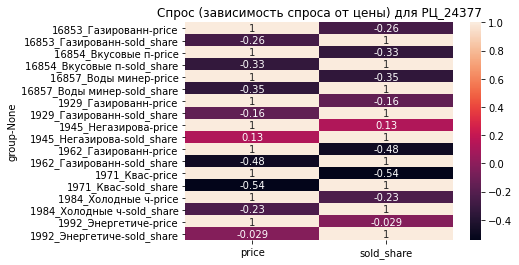

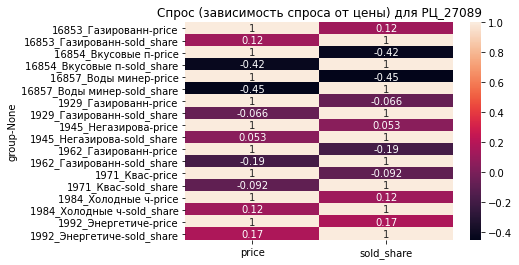

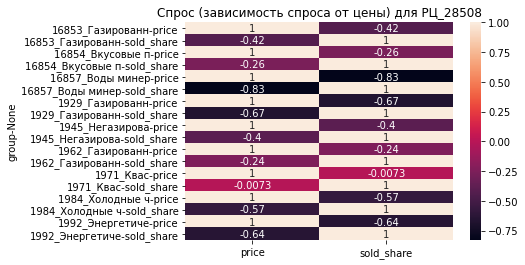

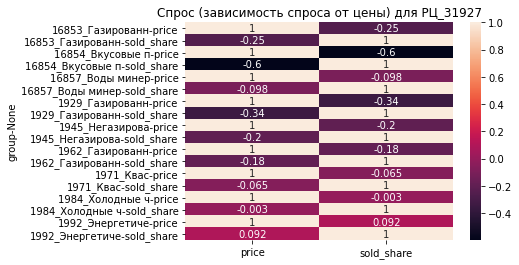

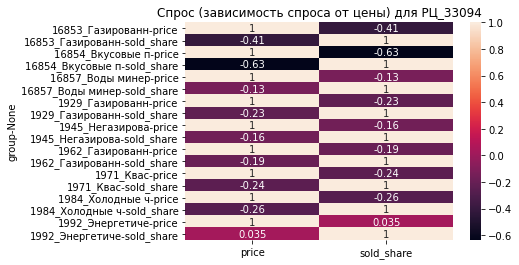

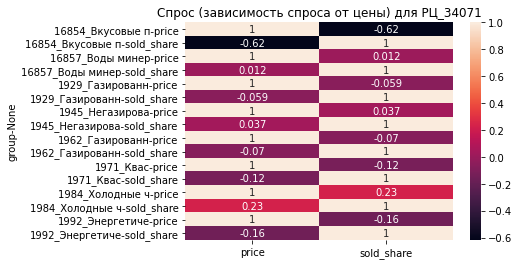

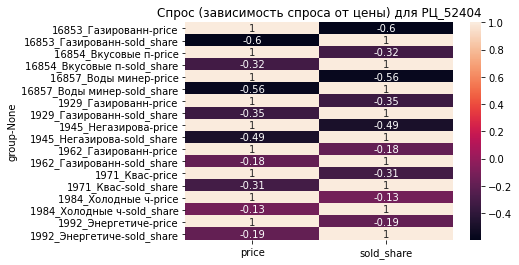

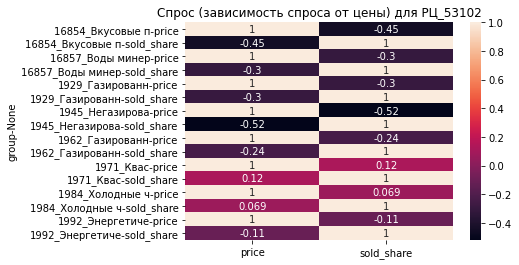

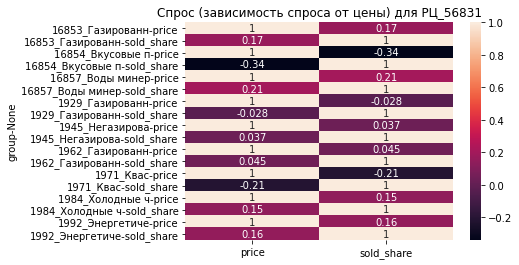

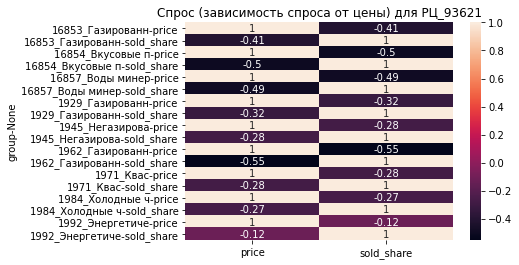

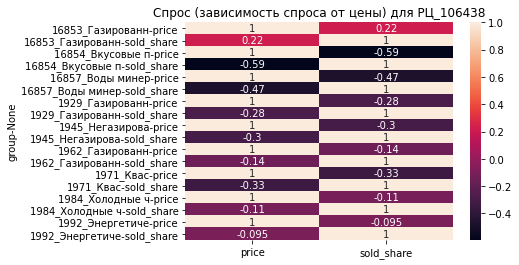

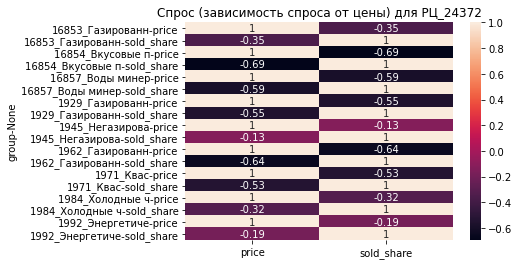

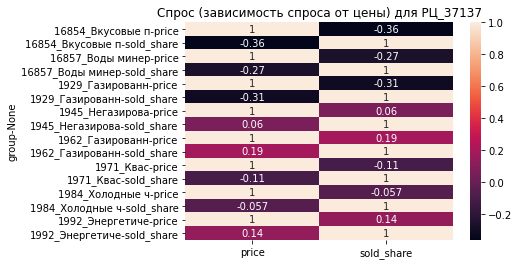

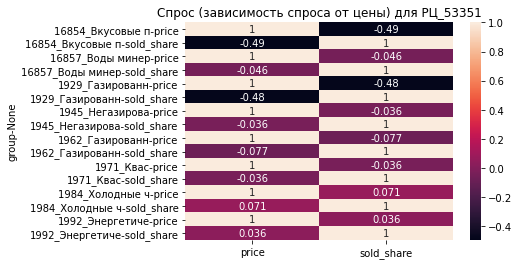

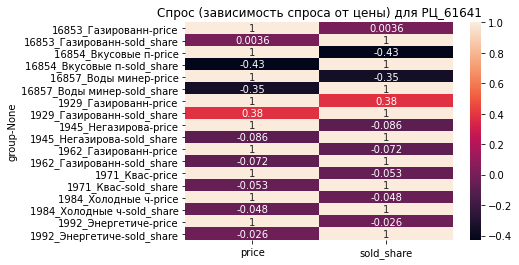

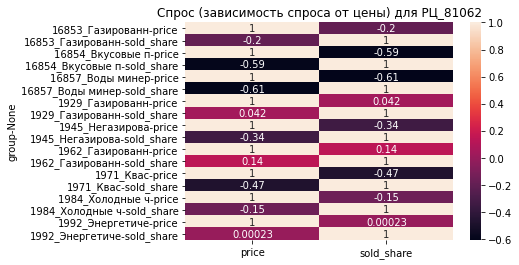

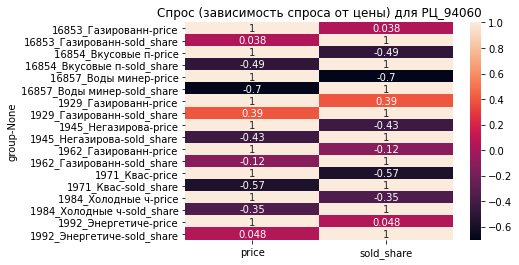

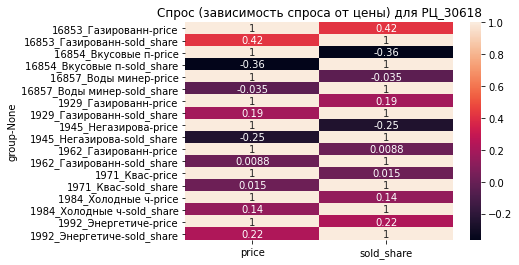

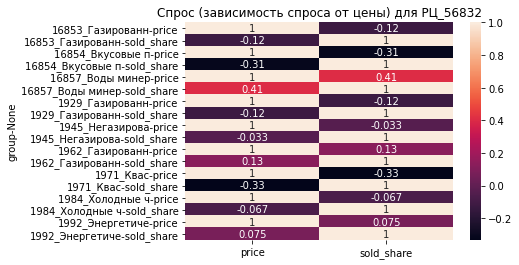

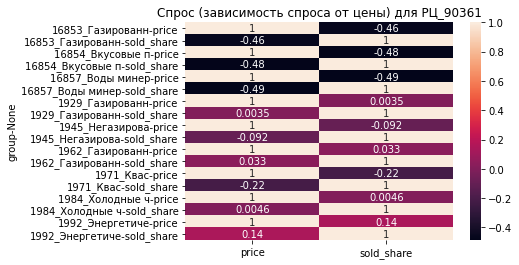

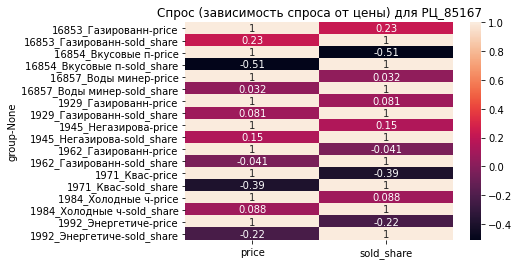

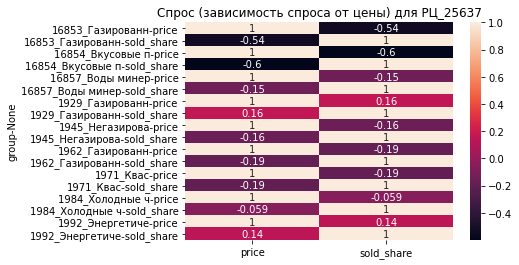

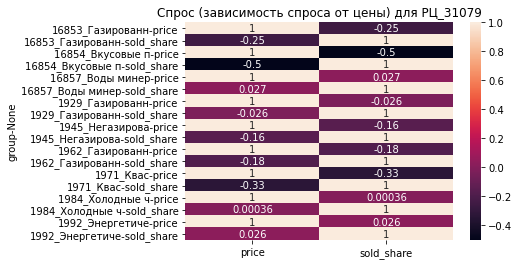

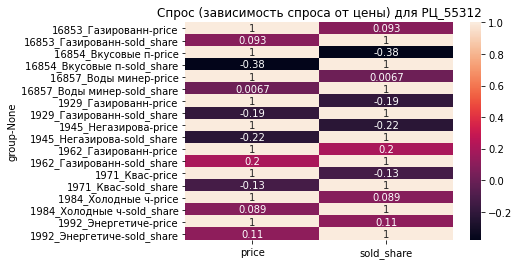

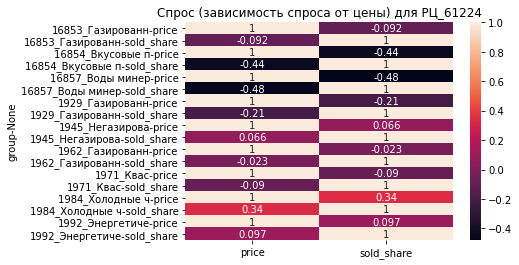

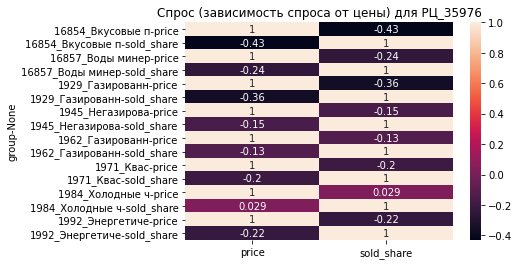

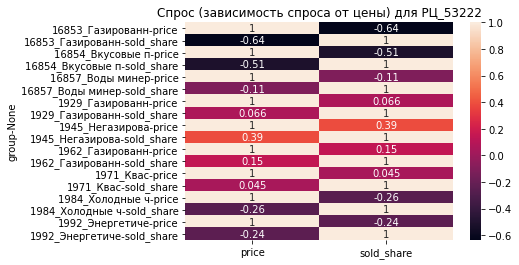

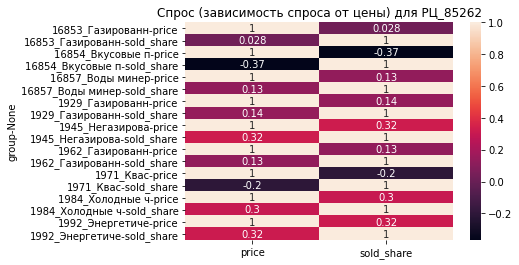

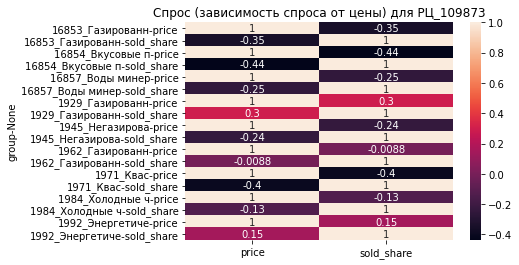

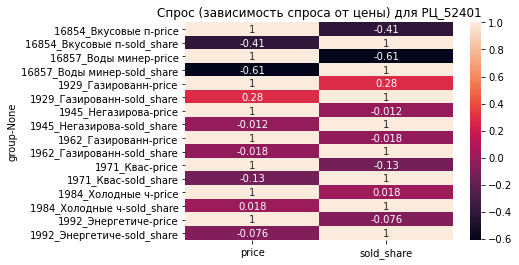

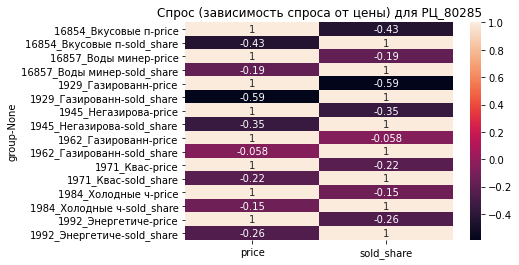

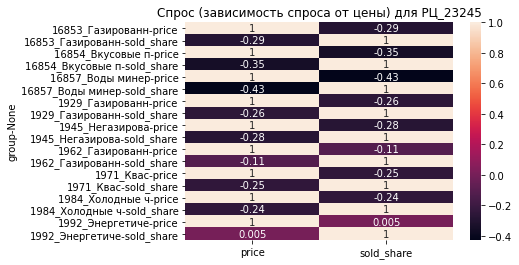

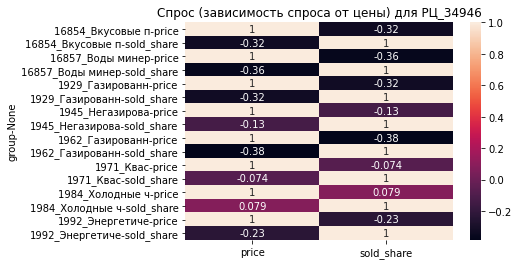

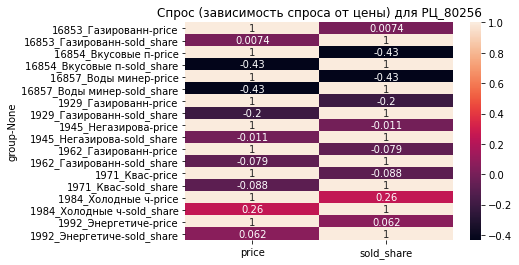

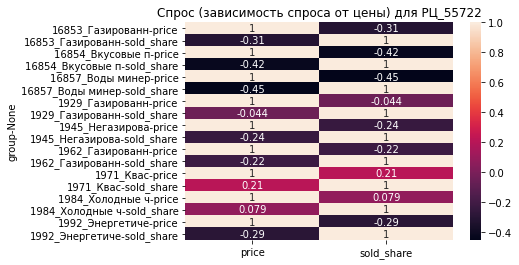

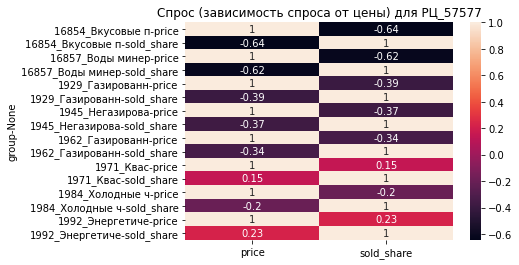

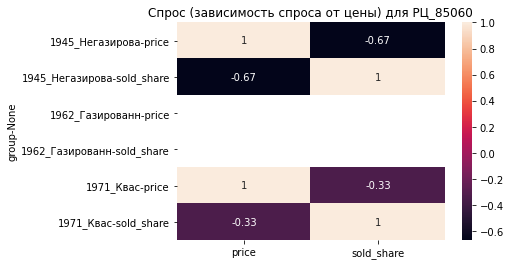

c:\users\phh1\.virtualenvs\jupyter\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\users\phh1\.virtualenvs\jupyter\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


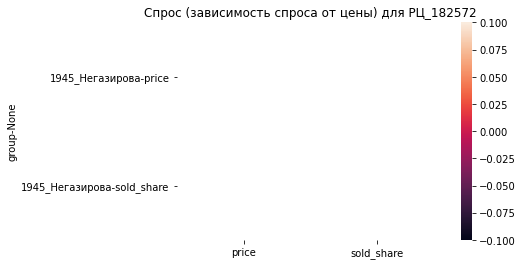

In [18]:
def get_heatmap(dist_c):
    corr =  data[data.dist_cent == dist_c].groupby('group')[['price', 'sold_share']].corr()
    fig, ax = plt.subplots()
    sns.heatmap(corr, annot=True)
    ax.set_title('Спрос (зависимость спроса от цены) для ' + dist_c)
    plt.show()
    

for i in data.dist_cent.unique():
    get_heatmap(i)

Еще один пример промежуточного вывода: В РЦ_24377 хороший спрос на энергетические напитки: покупательская способность не зависит от цены.

Мы посмотрели, как будет зависеть спрос (в каждом РЦ) от даты -> понимаем, как влияет погода на спрос.

### Общая корреляция

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57466 entries, 0 to 57465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          57466 non-null  datetime64[ns]
 1   dist_cent     57466 non-null  object        
 2   group         57466 non-null  object        
 3   sold_amount   57466 non-null  float64       
 4   fullness      57466 non-null  float64       
 5   price         57434 non-null  float64       
 6   left          57434 non-null  float64       
 7   promo_amount  57434 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.5+ MB


Поскольку у наст все еще есть отсутствующие строки, например, с ценой и с информацией по остатку, эти строки можно удалить совсем, так как их не много.

In [21]:
# # Колонку dist_cent можно превратить в dummy признак для того, чтобы можно было использовать эти данные в алгоритме
# def to_dummies(df, column):
#     dummie_column = pd.get_dummies(column)
#     return pd.concat([df, dummie_column], axis=1)

# df = to_dummies(df, df.dist_cent).drop('dist_cent', axis=1)
# df = to_dummies(df, df.group).drop('group', axis=1)

Text(0.5, 1.0, 'Общая таблица корреляции')

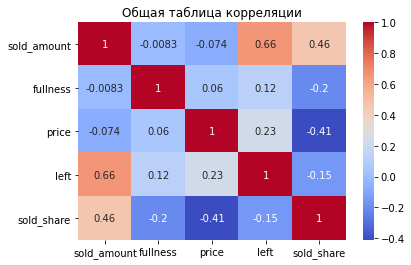

In [22]:
correlation_data = data[['sold_amount', 'fullness', 'price', 'left', 'sold_share']].dropna()
corr = correlation_data.corr(method='pearson')
corr

sns.heatmap(corr, annot=True, cmap = 'coolwarm')

plt.title('Общая таблица корреляции')

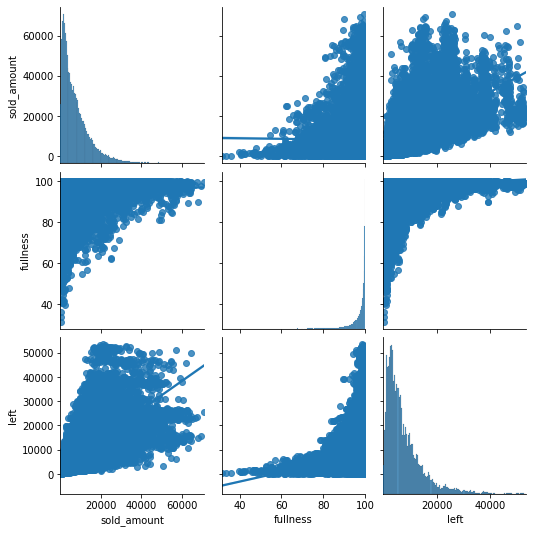

In [31]:
sns.pairplot(df[['sold_amount', 'fullness', 'left']].dropna(), kind = 'reg')

Наполненность, кол-во проданного товара и остаток имеют линейную зависимость, что естественно.

Q=a-b*P  
Q	=	linear demand curve  
a	=	factors influencing demand besides price  
b	=	slope  
P	=	price  


### Способ 2  

- В качестве переменной, означающей спрос, введем переменную процент продаж, которая будет формироваться на основе проданных товаров и остатка товара в ТТ
- оставим только те столбцы, которые влияют на процент продаж, чтобы затем его предсказать
- сравним предсказанное значение спроса (без учета даты и РЦ, которые определяют погоду) с оргинальным значением процента продаж
- процент ошибки определит, совмествое влияние остаточных факторов (РЦ+дата), а значит и погоды

In [23]:
def sale_share(row):
    return row['sold_amount'] / (row['sold_amount'] + row['left'])

df['sold_share'] = df.apply(sale_share, axis=1)
df

,date,dist_cent,group,sold_amount,fullness,price,left,promo_amount,sold_share
0,2019-07-03,РЦ_24377,1971_Квас,5139.166667,93.632097,59.2,1822.0,29.7,0.738262
1,2019-07-03,РЦ_27089,1945_Негазирова,19474.591750,98.447730,28.4,11372.0,39.0,0.631337
2,2019-07-03,РЦ_27089,1962_Газированн,18357.500000,99.417829,54.9,26471.0,89.9,0.409505
3,2019-07-03,РЦ_28508,16854_Вкусовые п,174.166667,98.771609,41.0,113.0,86.6,0.606500
4,2019-07-03,РЦ_31927,1984_Холодные ч,1851.666667,98.066521,48.5,5143.0,59.2,0.264726
...,...,...,...,...,...,...,...,...,...
57461,2019-07-16,РЦ_31079,1929_Газированн,3179.166667,99.805855,24.1,2622.0,22.0,0.548022
57462,2019-07-16,РЦ_31079,16854_Вкусовые п,570.000000,100.000000,44.2,860.0,37.3,0.398601
57463,2019-07-16,РЦ_31927,1929_Газированн,3178.333333,85.710144,27.8,4614.0,25.9,0.407880
57464,2019-07-16,РЦ_34071,1962_Газированн,15250.000000,99.881974,65.2,28061.0,62.2,0.352105


In [24]:
# создадим отдельные датафреймы на основе группы товаров и оставим только нужные колонки
df_kvas = df[df.group == '1971_Квас'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_mineral = df[df.group == '16857_Воды минер'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_cold_t = df[df.group == '1984_Холодные ч'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_energ = df[df.group == '1992_Энергетиче'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)

# некоторые группы имеют одинковое название, чтобы не путаться оставим номер группы
df_1945_negaz = df[df.group == '1945_Негазирова'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_1962_gaz = df[df.group == '1962_Газированн'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_1929_gaz = df[df.group == '1929_Газированн'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_116853_gaz = df[df.group == '116853_Газированн'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)
df_16854_vkus = df[df.group == '16854_Вкусовые п'].drop(['group', 'dist_cent', 'date', 'left', 'sold_amount'], axis=1)

# так, например, выглялит отчет по всем товарам, группые "квас", относительно распределительных центов
# print(df_kvas.groupby('dist_cent').date)

In [25]:
df_mineral

,fullness,price,promo_amount,sold_share
9,99.279438,42.5,33.8,0.436314
13,99.296937,34.5,31.2,0.568989
20,94.857654,30.9,17.0,0.582351
27,96.322161,38.0,31.9,0.493271
50,99.199882,29.5,7.2,0.721322
...,...,...,...,...
57410,98.828170,31.4,29.1,0.531505
57425,91.674470,38.6,40.9,0.381159
57431,98.624292,35.6,17.6,0.566967
57455,99.659907,41.2,21.9,0.443867


In [26]:
# попробуем обучить модель, например, на датафрейме, который содежит товары грппы "минеральная вода" предсказывать процент продаж

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df_mineral.drop(['sold_share'], axis=1).dropna()
y = df_mineral['sold_share'].dropna()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=77)

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [27]:
y_pred

array([0.4440841 , 0.51965675, 0.57690254, ..., 0.52027069, 0.46226356,
       0.52574417])

In [28]:
# определим коэффицент влияния остаточных факторов на процент продаж (спрос), то есть погоды 

from sklearn import metrics  # подгружаем метрики

MSE = (metrics.mean_squared_error(y, y_pred)) ** 0.5
print(MSE)

0.10647472100904146


Пример вывода: погода может влиять на продажу минеральной воды на 11 процентов